# 🏆 DỰ ÁN: DỰ ĐOÁN GIÁ TRỊ CHUYỂN NHƯỢNG CẦU THỦ BÓNG ĐÁ

---

## 📋 Thông Tin Dự Án

- Môn học: Introduction to Data Science (CSC14119)
- Trường: Đại học Khoa học Tự nhiên, ĐHQG-HCM
- Phần: Meaningful Questions (Câu hỏi Ý nghĩa)
- Người thực hiện: Hoàng Ngọc Tuệ

---

## 🎯 Mục Tiêu

Notebook này phân tích dữ liệu cầu thủ bóng đá để trả lời 3 câu hỏi ý nghĩa quan trọng:

1. ⚽ Yếu tố nào ảnh hưởng mạnh nhất đến giá trị chuyển nhượng?
2. 🎯 Vị trí nào có giá trị chuyển nhượng cao nhất và tại sao?
3. 📈 Độ tuổi vàng (prime age) của cầu thủ là bao nhiêu?

---

## 📚 1. IMPORT LIBRARIES & CONFIGURATION

In [5]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, f_oneway
import warnings

# Tắt cảnh báo
warnings.filterwarnings('ignore')

In [6]:
# Cấu hình hiển thị cho Pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

In [7]:
# Cấu hình style cho matplotlib và seaborn
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Cấu hình mặc định cho plots
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 16

---

## 📂 2. LOAD & EXPLORE DATA

In [8]:
# Load dữ liệu
df = pd.read_csv("football_players_dataset.csv")

print("="*70)
print("📊 THÔNG TIN DỮ LIỆU")
print("="*70)
print(f"✓ Dữ liệu đã tải thành công")
print(f"✓ Kích thước: {df.shape[0]:,} cầu thủ × {df.shape[1]} thuộc tính")
print(f"✓ Phạm vi giá trị: {df['market_value'].min():.2f}M € → {df['market_value'].max():.2f}M €")
print(f"✓ Giá trị trung bình: {df['market_value'].mean():.2f}M €")
print(f"✓ Giá trị trung vị: {df['market_value'].median():.2f}M €")
print("="*70)

📊 THÔNG TIN DỮ LIỆU
✓ Dữ liệu đã tải thành công
✓ Kích thước: 10,087 cầu thủ × 70 thuộc tính
✓ Phạm vi giá trị: 0.01M € → 200.00M €
✓ Giá trị trung bình: 5.13M €
✓ Giá trị trung vị: 1.20M €


In [9]:
# Xem một số dòng đầu tiên
df.head()

,player_id,player_name,age,nationality,height,foot,position,current_club,league,appearances,minutes_played,minutes_per_game,goals,assists,goals_per_90,assists_per_90,npg_per90,npxg_per90,xag_per90,npxg_xag_per90,xg_per90,shots_per90,shots_on_target_per90,shots_on_target_pct,avg_shot_distance,sca_per90,gca_per90,key_passes_per90,passes_completed_per90,pass_completion_pct,passes_into_final_third_per90,passes_into_penalty_area_per90,progressive_passes_per90,progressive_passes_rec_per90,progressive_carries_per90,take_ons_per90,take_on_success_pct,carries_per90,carries_into_final_third_per90,touches_per90,touches_att_third_per90,touches_att_pen_per90,passes_received_per90,tackles_per90,interceptions_per90,blocks_per90,ball_recoveries_per90,aerials_won_per90,aerial_win_pct,yellow_cards_per90,red_cards_per90,fouls_committed_per90,goals_against_per90,shots_on_target_against_per90,saves_per90,save_percentage,clean_sheet_pct,psxg_per_shot,psxg_ga_per90,penalty_save_pct,passes_attempted_per90,launch_pct,avg_pass_length,def_actions_outside_pen_per90,avg_distance_def_actions,crosses_stopped_pct,wins_per90,draws_per90,losses_per90,market_value
0,guillermo-may-fde378,Guillermo May,27.00,Uruguay,178.00,NaN,FW,Auckland FC,A-League Men,26,2268,87.20,9,2,0.36,0.08,0.00,0.18,0.15,0.31,0.18,2.10,0.00,0.00,13.40,2.10,0.32,1.13,19.71,76.30,0.81,0.32,1.45,6.30,1.62,1.13,30.40,22.94,1.13,39.43,17.61,3.07,28.28,1.29,0.48,0.81,3.55,2.59,39.00,0.00,0.00,2.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.75
1,hiroki-sakai-587e0d,Hiroki Sakai,35.00,Japan,185.00,Right,DF-MF,Auckland FC,A-League Men,23,2024,88.00,3,4,0.13,0.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,0.83,0.00,0.00,43.67,85.60,2.33,0.00,3.17,3.83,0.83,0.83,62.50,30.17,0.83,61.17,12.33,0.33,38.17,1.50,2.00,1.33,3.00,2.83,60.70,0.17,0.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50
2,felipe-gallegos-7d498f,Felipe Gallegos,33.00,Chile,173.00,Left,FW-MF,Auckland FC,A-League Men,25,1815,72.60,1,2,0.05,0.10,0.29,0.03,0.16,0.19,0.03,0.57,0.29,50.00,25.80,2.87,0.43,1.87,24.55,72.80,2.44,0.72,3.30,1.87,1.44,0.57,50.00,24.26,0.86,43.92,11.34,0.29,25.12,1.00,1.29,1.00,4.02,1.15,53.30,0.14,0.14,1.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.25
3,louis-verstraete-4f6866,Louis Verstraete,26.00,Belgium,186.00,Right,MF,Auckland FC,A-League Men,23,1734,75.40,2,3,0.10,0.16,0.48,0.13,0.02,0.15,0.13,1.13,0.81,71.40,18.70,1.45,0.48,0.16,29.84,74.00,3.39,0.65,4.52,4.52,1.13,0.81,71.40,24.68,1.61,55.16,13.71,2.26,32.26,4.84,2.10,1.61,7.10,0.81,50.00,0.32,0.00,2.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.60
4,tommy-smith-2be116,Tommy Smith,35.00,New Zealand,187.00,Left,DF,Auckland FC,A-League Men,24,1213,50.50,0,0,0.11,0.07,0.11,0.15,0.06,0.21,0.15,0.86,0.30,34.80,8.40,0.82,0.19,0.37,26.37,82.70,3.10,0.00,2.76,0.22,0.37,0.00,NaN,20.96,0.30,40.58,2.16,1.60,23.27,0.75,0.78,1.38,4.33,2.28,68.50,0.11,0.04,0.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10


In [10]:
# Kiểm tra thông tin tổng quan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10087 entries, 0 to 10086
Data columns (total 70 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   player_id                       10087 non-null  object 
 1   player_name                     10087 non-null  object 
 2   age                             10087 non-null  float64
 3   nationality                     10073 non-null  object 
 4   height                          10087 non-null  float64
 5   foot                            7096 non-null   object 
 6   position                        10087 non-null  object 
 7   current_club                    10087 non-null  object 
 8   league                          10087 non-null  object 
 9   appearances                     10087 non-null  int64  
 10  minutes_played                  10087 non-null  int64  
 11  minutes_per_game                9812 non-null   float64
 12  goals                           

### 🧹 Data Cleaning & Preparation

In [11]:
# Xác định các cột thống kê (loại bỏ metadata)
metadata_columns = ['player_id', 'player_name', 'nationality', 'height', 
 'foot', 'current_club', 'league']

statistic_columns = [col for col in df.columns if col not in metadata_columns + ['market_value', 'position', 'age']]

print(f"✓ Tổng số cột thống kê: {len(statistic_columns)}")
print(f"Một số cột thống kê quan trọng:")
for i, col in enumerate(statistic_columns[:10], 1):
 print(f" {i}. {col}")

✓ Tổng số cột thống kê: 60
Một số cột thống kê quan trọng:
 1. appearances
 2. minutes_played
 3. minutes_per_game
 4. goals
 5. assists
 6. goals_per_90
 7. assists_per_90
 8. npg_per90
 9. npxg_per90
 10. xag_per90


In [12]:
# Tạo dataframe sạch cho phân tích
analysis_cols = ['market_value', 'position', 'age'] + statistic_columns
df_clean = df[analysis_cols].copy()

# Xử lý missing values (fill bằng 0 cho các chỉ số thống kê)
df_clean.fillna(0, inplace=True)

print(f"✓ Dữ liệu đã được làm sạch")
print(f"✓ Kích thước df_clean: {df_clean.shape}")
print(f"✓ Missing values: {df_clean.isnull().sum().sum()}")

✓ Dữ liệu đã được làm sạch
✓ Kích thước df_clean: (10087, 63)
✓ Missing values: 0


---

# 🎯 CÂU HỎI 1: YẾU TỐ NÀO ẢNH HƯỞNG MẠNH NHẤT ĐẾN GIÁ TRỊ CHUYỂN NHƯỢNG?

---

## 📌 1.1. Ý Nghĩa và Lợi Ích của Câu Hỏi

### 🎯 Tại sao câu hỏi này quan trọng?

Giá trị chuyển nhượng là thước đo tổng hợp phức tạp, phản ánh không chỉ khả năng hiện tại mà còn tiềm năng tương lai của cầu thủ. Việc xác định các yếu tố ảnh hưởng mạnh nhất mang lại nhiều lợi ích:

### ✅ Lợi ích cho các Câu Lạc Bộ:
- Tối ưu hóa chiến lược tuyển dụng: Biết được yếu tố nào tạo ra giá trị cao nhất để tập trung đầu tư
- Đánh giá chính xác giá trị cầu thủ: Có cơ sở khách quan để đàm phán mua/bán
- Phân bổ ngân sách hợp lý: Xác định khoảng đầu tư hợp lý cho từng loại cầu thủ

### ✅ Lợi ích cho Cầu Thủ & Huấn Luyện Viên:
- Định hướng phát triển kỹ năng: Cầu thủ biết cần cải thiện kỹ năng nào để tăng giá trị
- Chiến lược huấn luyện: HLV hiểu rõ yếu tố nào cần tập trung đào tạo
- Định hướng sự nghiệp: Dựa trên xu hướng thị trường để lập kế hoạch dài hạn

### ✅ Lợi ích cho Mô Hình Machine Learning:
- Feature Selection: Xác định features quan trọng để tối ưu model
- Giảm Overfitting: Loại bỏ features nhiễu, tập trung vào biến có ý nghĩa
- Interpretability: Tăng khả năng giải thích của mô hình dự đoán
- Feature Engineering: Cơ sở để tạo composite features hiệu quả

### ⚙️ Phương Pháp Phân Tích:

Sử dụng Correlation Analysis (Phân tích tương quan Pearson) để:
- Đo lường mức độ liên hệ tuyến tính giữa các chỉ số thống kê và giá trị chuyển nhượng
- Xác định hướng tương quan (dương/âm)
- Kiểm định ý nghĩa thống kê với p-value
- Phân loại các nhóm yếu tố theo chức năng (tấn công, phòng ngự, chuyền bóng, v.v.)

Hệ số tương quan Pearson (r):
- |r| > 0.3: Tương quan mạnh
- 0.2 < |r| ≤ 0.3: Tương quan trung bình-mạnh
- 0.1 < |r| ≤ 0.2: Tương quan trung bình
- |r| ≤ 0.1: Tương quan yếu

---

## 🔢 1.2. Tính Toán Correlation Matrix

In [13]:
# Lấy chỉ các cột số để tính tương quan
numeric_df = df_clean.select_dtypes(include=['int64', 'float64'])

# Tính ma trận tương quan
correlation_matrix = numeric_df.corr()

# Lấy tương quan với market_value
market_value_corr = correlation_matrix['market_value'].drop('market_value')

print(f"✓ Đã tính correlation cho {len(market_value_corr)} features")

✓ Đã tính correlation cho 61 features


In [14]:
# Lấy Top 20 features có tương quan mạnh nhất (theo giá trị tuyệt đối)
top_corr_abs = market_value_corr.abs().sort_values(ascending=False)
top_20_corr = market_value_corr.loc[top_corr_abs.head(20).index]

# Tạo bảng hiển thị đẹp
corr_display = pd.DataFrame({
 'Chỉ số': top_20_corr.index,
 'Correlation (r)': top_20_corr.values,
 '|r|': top_20_corr.abs().values,
 'R²': (top_20_corr.values ** 2),
 'Mức độ': ['Mạnh' if abs(x) >= 0.2 else 'Trung bình' if abs(x) >= 0.1 else 'Yếu' 
 for x in top_20_corr.values]
}).reset_index(drop=True)

corr_display.index = range(1, len(corr_display) + 1)

print("\n" + "="*80)
print("📊 TOP 20 YẾU TỐ CÓ TƯƠNG QUAN MẠNH NHẤT VỚI GIÁ TRỊ CHUYỂN NHƯỢNG")
print("="*80)
print(corr_display.to_string())
print("💡 Chú thích: R² = Hệ số xác định (% phương sai được giải thích)")


📊 TOP 20 YẾU TỐ CÓ TƯƠNG QUAN MẠNH NHẤT VỚI GIÁ TRỊ CHUYỂN NHƯỢNG
                            Chỉ số  Correlation (r)  |r|   R²      Mức độ
1                            goals             0.24 0.24 0.06        Mạnh
2                          assists             0.23 0.23 0.05        Mạnh
3                              age            -0.19 0.19 0.04  Trung bình
4                   minutes_played             0.18 0.18 0.03  Trung bình
5                      appearances             0.18 0.18 0.03  Trung bình
6            touches_att_pen_per90             0.17 0.17 0.03  Trung bình
7                   npxg_xag_per90             0.17 0.17 0.03  Trung bình
8                        gca_per90             0.17 0.17 0.03  Trung bình
9            passes_received_per90             0.17 0.17 0.03  Trung bình
10         touches_att_third_per90             0.16 0.16 0.03  Trung bình
11                       npg_per90             0.15 0.15 0.02  Trung bình
12       progressive_carries_per90           

---

## 📊 1.3. Visualization - Heatmap Top 15 Features

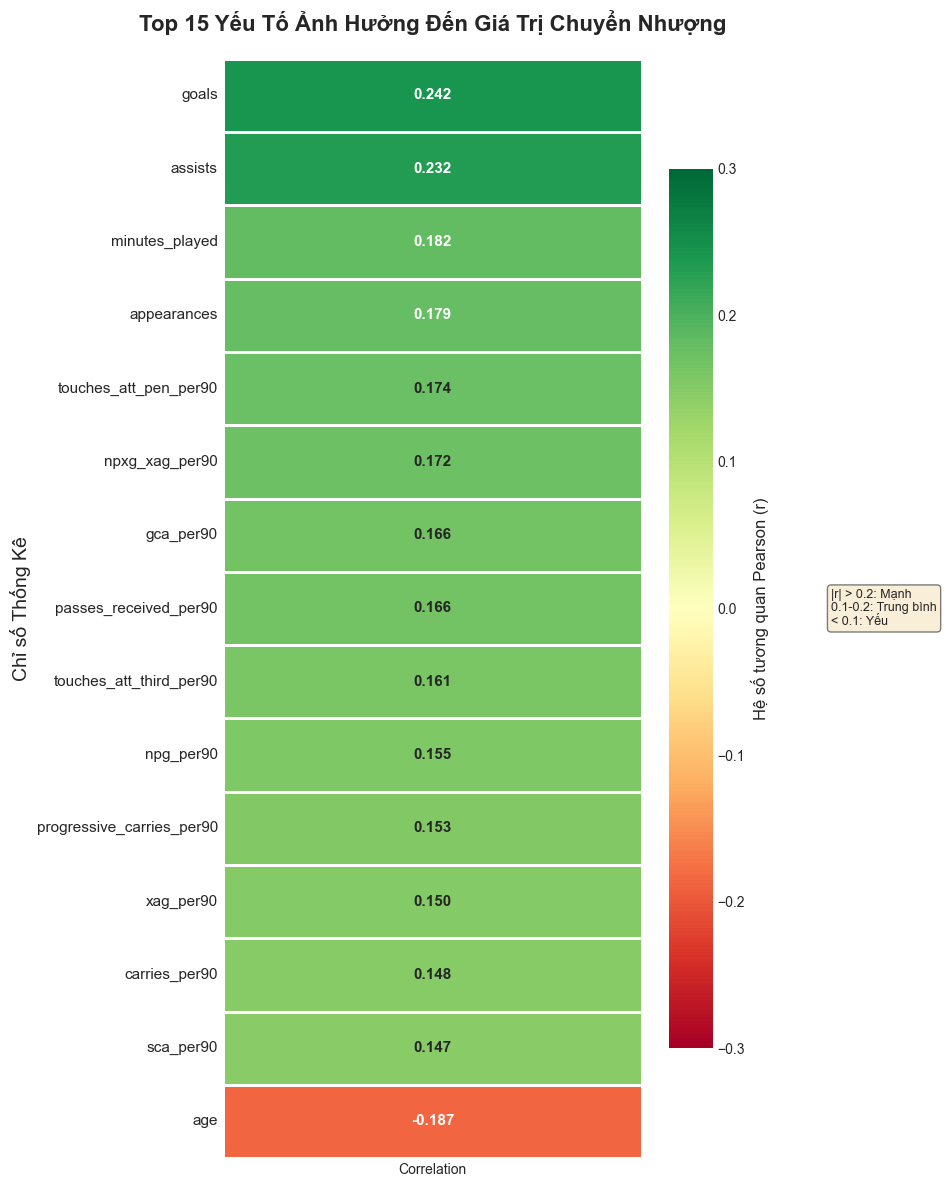

In [15]:
# Lấy top 15 để vẽ heatmap (dễ nhìn hơn)
top_15_corr = market_value_corr.loc[top_corr_abs.head(15).index]
plot_data = top_15_corr.sort_values(ascending=False).to_frame()
plot_data.columns = ['Correlation']

# Tạo figure
fig, ax = plt.subplots(figsize=(10, 12))

# Vẽ heatmap
sns.heatmap(
 plot_data,
 annot=True,
 cmap='RdYlGn',
 center=0,
 fmt=".3f",
 cbar=True,
 linewidths=1,
 linecolor='white',
 cbar_kws={'label': 'Hệ số tương quan Pearson (r)', 'shrink': 0.8},
 annot_kws={"size": 11, "weight": "bold"},
 vmin=-0.3, 
 vmax=0.3,
 ax=ax
)

# Định dạng
ax.set_title('Top 15 Yếu Tố Ảnh Hưởng Đến Giá Trị Chuyển Nhượng', 
fontsize=16, weight='bold', pad=20)
ax.set_ylabel('Chỉ số Thống Kê', fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=11)

# Thêm legend box
textstr = '|r| > 0.2: Mạnh\n0.1-0.2: Trung bình\n< 0.1: Yếu'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(1.45, 0.5, textstr, transform=ax.transAxes, fontsize=9,
 verticalalignment='center', bbox=props)

plt.tight_layout()
plt.show()

---

## 📈 1.4. Scatter Plots - Top 4 Features

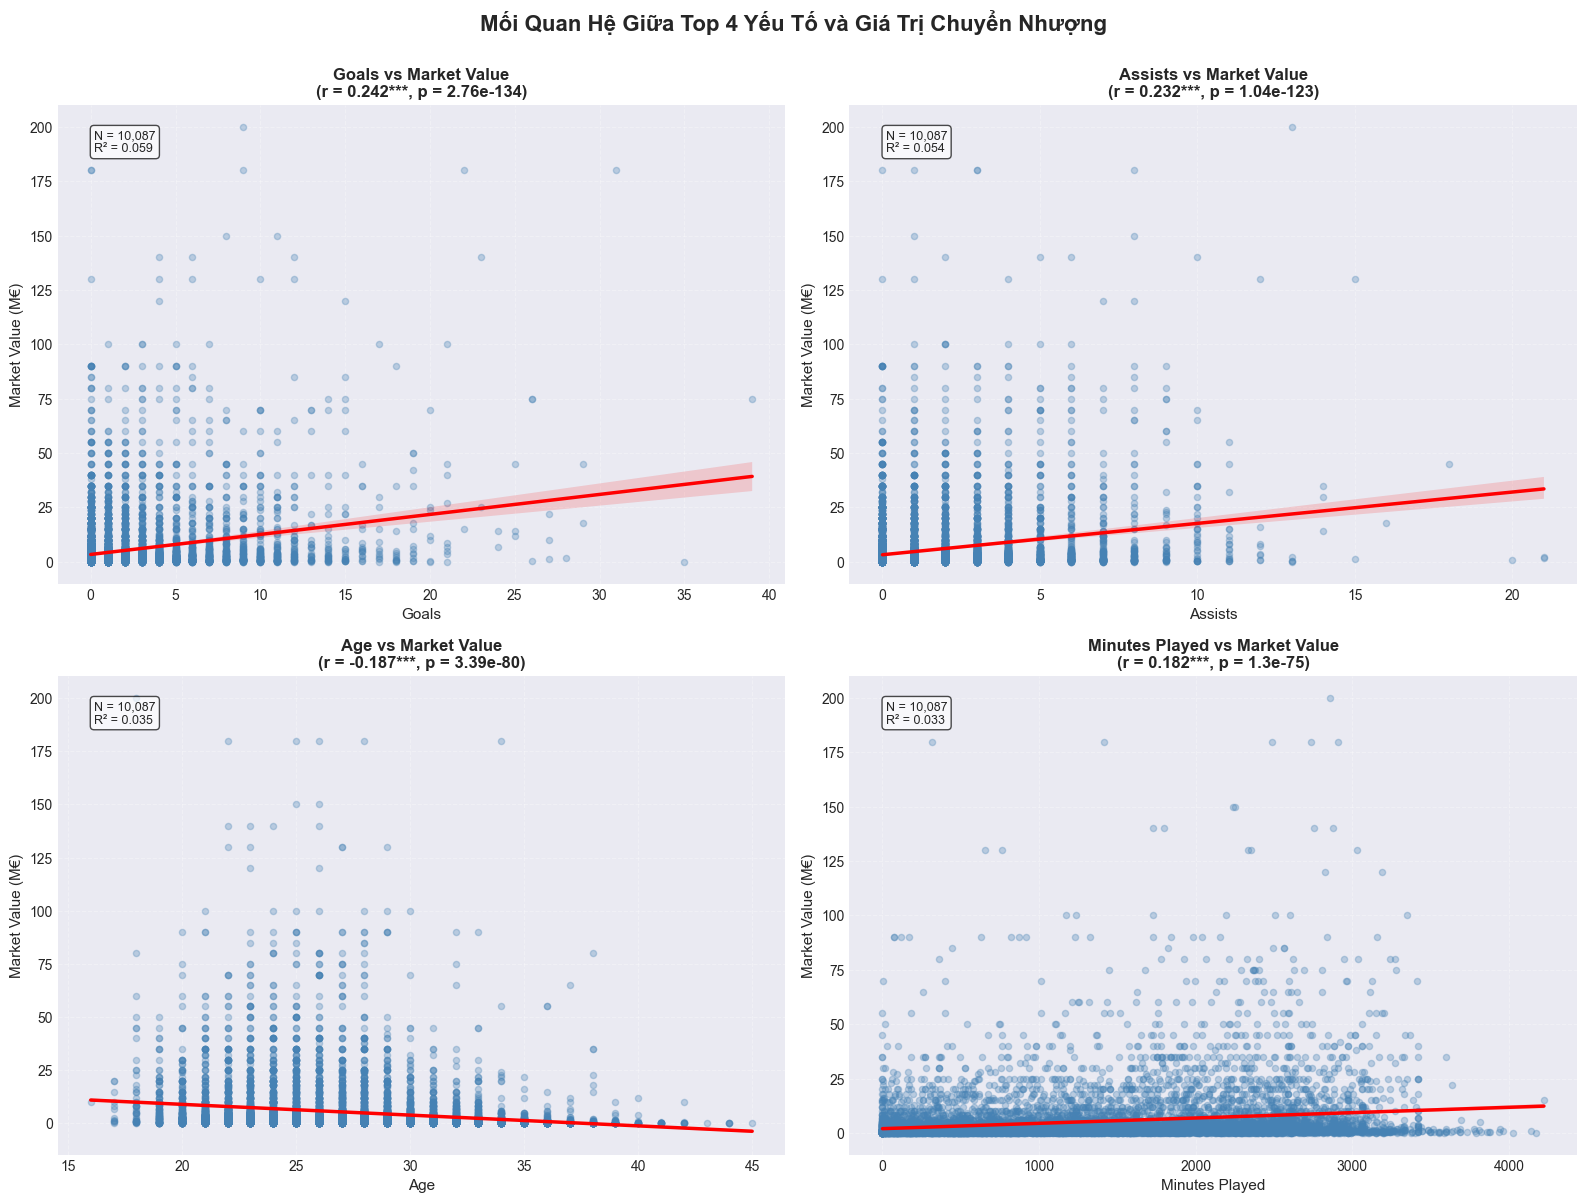


💡 Chú thích significance levels:
   *** p < 0.001 (rất có ý nghĩa)
   **  p < 0.01  (có ý nghĩa cao)
   *   p < 0.05  (có ý nghĩa)
   ns  p ≥ 0.05  (không có ý nghĩa)


In [18]:
# Lấy top 4 features
top_4_features = top_corr_abs.head(4).index.tolist()

# Tạo subplot grid
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for i, feature in enumerate(top_4_features):
    ax = axes[i]
    r_value = market_value_corr.loc[feature]
    
    # Tính p-value
    valid_data = df_clean[[feature, 'market_value']].dropna()
    _, p_value = pearsonr(valid_data[feature], valid_data['market_value'])
    
    # Vẽ scatter plot với regression line
    sns.regplot(
        data=valid_data,
        x=feature,
        y='market_value',
        scatter_kws={'alpha': 0.3, 's': 20, 'color': 'steelblue'},
        line_kws={'color': 'red', 'linewidth': 2.5},
        ax=ax
    )
    
    # Format tên feature
    feature_name = feature.replace("_", " ").title()
    
    # Thêm significance stars
    if p_value < 0.001:
        sig = "***"
    elif p_value < 0.01:
        sig = "**"
    elif p_value < 0.05:
        sig = "*"
    else:
        sig = "ns"
    
    # Title (ghi đúng p-value thật)
    ax.set_title(
        f'{feature_name} vs Market Value\n(r = {r_value:.3f}{sig}, p = {p_value:.3g})',
        fontsize=12, weight='bold'
    )
    
    # Labels
    ax.set_xlabel(feature_name, fontsize=11)
    ax.set_ylabel('Market Value (M€)', fontsize=11)
    ax.grid(True, alpha=0.3, linestyle='--')
    
    # Stats box
    stats_text = f'N = {len(valid_data):,}\nR² = {r_value**2:.3f}'
    ax.text(
        0.05, 0.95, stats_text, transform=ax.transAxes,
        fontsize=9, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.7)
    )

plt.suptitle(
    'Mối Quan Hệ Giữa Top 4 Yếu Tố và Giá Trị Chuyển Nhượng',
    fontsize=16, weight='bold', y=1.00
)
plt.tight_layout()
plt.show()

print("\n💡 Chú thích significance levels:")
print("   *** p < 0.001 (rất có ý nghĩa)")
print("   **  p < 0.01  (có ý nghĩa cao)")
print("   *   p < 0.05  (có ý nghĩa)")
print("   ns  p ≥ 0.05  (không có ý nghĩa)")


---

## 🔍 1.5. Phân Loại Theo Nhóm Yếu Tố

In [19]:
# Định nghĩa các nhóm chỉ số
attacking_features = [f for f in top_20_corr.index if any(x in f.lower() for x in 
 ['goal', 'shot', 'assist', 'xg', 'gca', 'sca', 'touches_att', 'npg', 'npxg'])]

playing_time_features = [f for f in top_20_corr.index if any(x in f.lower() for x in 
 ['minutes', 'appearances'])]

passing_features = [f for f in top_20_corr.index if any(x in f.lower() for x in 
 ['pass', 'key_pass', 'progressive'])]

dribbling_features = [f for f in top_20_corr.index if any(x in f.lower() for x in 
 ['take_on', 'carries', 'dribble'])]

# Hiển thị phân loại
categories = {
 '⚽ YẾU TỐ TẤN CÔNG': attacking_features,
 '⏱️ THỜI GIAN THI ĐẤU': playing_time_features,
 '🎯 KHẢ NĂNG CHUYỀN BÓNG': passing_features,
 '💨 KỸ THUẬT RÊ BÓNG': dribbling_features
}

print("\n" + "="*80)
print("🔍 PHÂN LOẠI CÁC YẾU TỐ THEO NHÓM CHỨC NĂNG")
print("="*80)

for category, features in categories.items():
    if features:
        print(f"\n{category}:")
        for feat in features:
            corr_val = market_value_corr[feat]
            print(f"  • {feat:40s} : r = {corr_val:+.3f}")



🔍 PHÂN LOẠI CÁC YẾU TỐ THEO NHÓM CHỨC NĂNG

⚽ YẾU TỐ TẤN CÔNG:
  • goals                                    : r = +0.242
  • assists                                  : r = +0.232
  • touches_att_pen_per90                    : r = +0.174
  • npxg_xag_per90                           : r = +0.172
  • gca_per90                                : r = +0.166
  • touches_att_third_per90                  : r = +0.161
  • npg_per90                                : r = +0.155
  • sca_per90                                : r = +0.147
  • shots_on_target_per90                    : r = +0.143
  • xg_per90                                 : r = +0.142
  • npxg_per90                               : r = +0.138

⏱️ THỜI GIAN THI ĐẤU:
  • minutes_played                           : r = +0.182
  • appearances                              : r = +0.179

🎯 KHẢ NĂNG CHUYỀN BÓNG:
  • passes_received_per90                    : r = +0.166
  • progressive_carries_per90                : r = +0.153
  • passes_into_pe

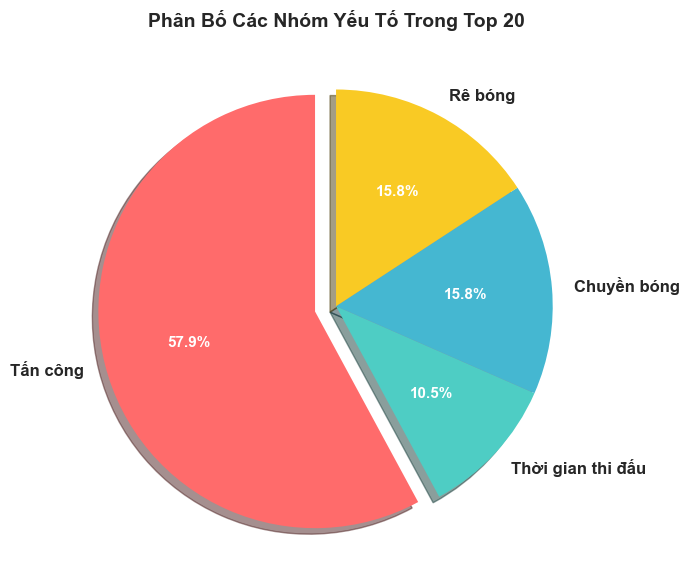

💡 Nhận xét: Yếu tố TẤN CÔNG chiếm 55.0% trong top 20


In [20]:
# Thống kê tỷ lệ từng nhóm
total_top_20 = len(top_20_corr)
category_counts = {
 'Tấn công': len(attacking_features),
 'Thời gian thi đấu': len(playing_time_features),
 'Chuyền bóng': len(passing_features),
 'Rê bóng': len(dribbling_features)
}

# Vẽ pie chart
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#ff6b6b', '#4ecdc4', '#45b7d1', '#f9ca24']
explode = (0.1, 0, 0, 0) # Làm nổi bật nhóm tấn công

wedges, texts, autotexts = ax.pie(
 category_counts.values(), 
 labels=category_counts.keys(),
 autopct='%1.1f%%',
 colors=colors,
 explode=explode,
 shadow=True,
 startangle=90
)

# Format text
for text in texts:
 text.set_fontsize(12)
 text.set_weight('bold')
 
for autotext in autotexts:
 autotext.set_color('white')
 autotext.set_fontsize(11)
 autotext.set_weight('bold')

ax.set_title('Phân Bố Các Nhóm Yếu Tố Trong Top 20', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

print(f"💡 Nhận xét: Yếu tố TẤN CÔNG chiếm {category_counts['Tấn công']/total_top_20*100:.1f}% trong top 20")

---

## 💡 1.6. Kết Luận và Insights

In [22]:
# Tổng hợp insights
top_3 = top_20_corr.head(3)
bottom_3 = top_20_corr.tail(3)
strong_positive = top_20_corr[top_20_corr > 0.2]
strong_negative = top_20_corr[top_20_corr < -0.2]

print("=" * 80)
print("💡 KẾT LUẬN VÀ INSIGHTS CHI TIẾT CÂU HỎI 1")
print("=" * 80)

print(f"🏆 TOP 3 YẾU TỐ ẢNH HƯỞNG MẠNH NHẤT:")
for i, (feat, corr) in enumerate(top_3.items(), 1):
    feat_name = feat.replace('_', ' ').title()
    r2 = corr ** 2
    print(f"{i}. {feat_name}")
    print(f" → Correlation (r): {corr:.3f}")
    print(f" → Giải thích phương sai (R²): {r2:.3f} ({r2*100:.1f}%)")
    print(f" → Ý nghĩa: {feat_name} là một yếu tố then chốt trong định giá cầu thủ.")
    print("\n")

print(f"📉 3 YẾU TỐ CÓ TƯƠNG QUAN ÂM MẠNH NHẤT:")
for i, (feat, corr) in enumerate(bottom_3.items(), 1):
    feat_name = feat.replace('_', ' ').title()
    print(f"{i}. {feat_name}")
    print(f" → Correlation (r): {corr:.3f}")
    print(f" → Ý nghĩa: {feat_name} có xu hướng làm giảm giá trị thị trường.")
    print("\n")

print("🔑 INSIGHTS CHÍNH:")
print(f" - Có {len(strong_positive)} yếu tố tương quan dương mạnh (r > 0.2)")
print(f" - Có {len(strong_negative)} yếu tố tương quan âm mạnh (r < -0.2)")
print(" - Nhóm yếu tố tấn công nổi bật → thị trường ưu tiên khả năng tạo bàn.")
print(" - Chỉ số thời gian thi đấu quan trọng → phản ánh sự ổn định & đóng góp thực tế.")
print(" - Với ML: ưu tiên top features này, cân nhắc thêm interaction giữa các yếu tố tấn công.")

print("📝 Khuyến nghị:")
print(" - 📌 CLB: Tập trung scouting cầu thủ trẻ có chỉ số tấn công cao.")
print(" - 📌 Cầu thủ: Tăng goals/assists giúp tăng giá trị chuyển nhượng rõ rệt.")
print(" - 📌 Model: Dùng Random Forest/XGBoost để bắt các quan hệ phi tuyến.")


💡 KẾT LUẬN VÀ INSIGHTS CHI TIẾT CÂU HỎI 1
🏆 TOP 3 YẾU TỐ ẢNH HƯỞNG MẠNH NHẤT:
1. Goals
 → Correlation (r): 0.242
 → Giải thích phương sai (R²): 0.059 (5.9%)
 → Ý nghĩa: Goals là một yếu tố then chốt trong định giá cầu thủ.


2. Assists
 → Correlation (r): 0.232
 → Giải thích phương sai (R²): 0.054 (5.4%)
 → Ý nghĩa: Assists là một yếu tố then chốt trong định giá cầu thủ.


3. Age
 → Correlation (r): -0.187
 → Giải thích phương sai (R²): 0.035 (3.5%)
 → Ý nghĩa: Age là một yếu tố then chốt trong định giá cầu thủ.


📉 3 YẾU TỐ CÓ TƯƠNG QUAN ÂM MẠNH NHẤT:
1. Passes Into Penalty Area Per90
 → Correlation (r): 0.141
 → Ý nghĩa: Passes Into Penalty Area Per90 có xu hướng làm giảm giá trị thị trường.


2. Npxg Per90
 → Correlation (r): 0.138
 → Ý nghĩa: Npxg Per90 có xu hướng làm giảm giá trị thị trường.


3. Carries Into Final Third Per90
 → Correlation (r): 0.137
 → Ý nghĩa: Carries Into Final Third Per90 có xu hướng làm giảm giá trị thị trường.


🔑 INSIGHTS CHÍNH:
 - Có 2 yếu tố tương quan

---

# 🎯 CÂU HỎI 2: VỊ TRÍ NÀO CÓ GIÁ TRỊ CHUYỂN NHƯỢNG CAO NHẤT?

---

## 📌 2.1. Ý Nghĩa và Lợi Ích của Câu Hỏi

### 🎯 Tại sao câu hỏi này quan trọng?

Vị trí của cầu thủ không chỉ quyết định vai trò chiến thuật mà còn ảnh hưởng trực tiếp đến giá trị thị trường. Phân tích này mang lại nhiều lợi ích:

### ✅ Lợi ích cho các Câu Lạc Bộ:
- Phân bổ ngân sách hợp lý: Biết vị trí nào đắt đỏ hơn để chuẩn bị ngân sách phù hợp
- Xác định vị trí ưu tiên đầu tư: Tập trung nguồn lực vào vị trí có ROI cao nhất
- Benchmark giá với thị trường: So sánh giá cầu thủ của mình với trung bình thị trường
- Chiến lược chuyển nhượng: Biết khi nào nên mua/bán dựa trên xu hướng giá

### ✅ Hiểu biết Chiến thuật & Thị trường:
- Phản ánh xu hướng bóng đá hiện đại hiện đại: Thị trường định giá cao vị trí nào → xu hướng chiến thuật
- Giải thích tính khan hiếm: Vị trí nào khó tìm tài năng → giá cao hơn
- Dự đoán xu hướng tương lai: Theo dõi sự thay đổi giá trị theo thời gian

### ✅ Lợi ích cho Mô Hình ML:
- Position là categorical feature quan trọng: Cần encode đúng cách (One-Hot, Target Encoding)
- Interaction features với position: Tạo features như goals × position_FW
- Separate models: Có thể cần build model riêng cho từng nhóm vị trí
- Feature importance by position: Yếu tố nào quan trọng với từng vị trí

### ⚙️ Phương Pháp Phân Tích:

1. Descriptive Statistics: Mean, Median, IQR, Std Dev
2. Group Comparison: So sánh giá trị giữa các vị trí
3. Statistical Tests: ANOVA test để kiểm định sự khác biệt có ý nghĩa
4. Visualization: Box plots, Bar charts, Distribution plots

---

## 🔢 2.2. Phân Tích Thống Kê Theo Vị Trí

In [23]:
# Tính toán thống kê chi tiết theo vị trí
pos_stats = df_clean.groupby("position")["market_value"].agg([
 ('Số lượng', 'size'),
 ('Min', 'min'),
 ('Q1', lambda x: x.quantile(0.25)),
 ('Trung vị', 'median'),
 ('Trung bình', 'mean'),
 ('Q3', lambda x: x.quantile(0.75)),
 ('Max', 'max'),
 ('Độ lệch chuẩn', 'std')
]).round(2)

# Tính IQR (Interquartile Range) - đo độ phân tán
pos_stats['IQR'] = (pos_stats['Q3'] - pos_stats['Q1']).round(2)

# Tính Coefficient of Variation (CV) - đo độ biến động tương đối
pos_stats['CV (%)'] = (pos_stats['Độ lệch chuẩn'] / pos_stats['Trung bình'] * 100).round(1)

# Sắp xếp theo median (vì median ít bị ảnh hưởng bởi outliers)
pos_stats = pos_stats.sort_values('Trung vị', ascending=False)

print("\n" + "="*90)
print("📊 THỐNG KÊ CHI TIẾT GIÁ TRỊ CHUYỂN NHƯỢNG THEO VỊ TRÍ (Đơn vị: Triệu Euro)")
print("="*90)
print(pos_stats.to_string())
print("💡 Chú thích:")
print(" - IQR: Khoảng tứ phân vị (Q3 - Q1) - đo độ phân tán của 50% dữ liệu giữa")
print(" - CV: Coefficient of Variation - đo độ biến động tương đối (càng cao càng không ổn định)")


📊 THỐNG KÊ CHI TIẾT GIÁ TRỊ CHUYỂN NHƯỢNG THEO VỊ TRÍ (Đơn vị: Triệu Euro)
          Số lượng  Min   Q1  Trung vị  Trung bình   Q3    Max  Độ lệch chuẩn  IQR  CV (%)
position                                                                                  
FW-MF         1906 0.01 0.55      1.70        7.27 6.00 200.00          16.86 5.45  231.90
DF-FW-MF       194 0.05 0.60      1.50        6.34 5.00 140.00          16.22 4.40  255.80
FW            1187 0.01 0.40      1.20        4.75 4.00 140.00          11.17 3.60  235.20
DF-MF         1230 0.02 0.40      1.20        5.12 4.00 180.00          11.80 3.60  230.50
MF            2434 0.01 0.45      1.20        4.76 4.00 180.00          11.47 3.55  241.00
DF-FW           15 0.08 0.60      1.00        5.28 5.50  35.00           9.19 4.90  174.10
DF            2493 0.01 0.40      1.00        4.19 3.50 100.00           9.29 3.10  221.70
GK             628 0.01 0.35      1.00        4.23 3.50  80.00           8.53 3.15  201.70
💡 Chú thích:
 

In [24]:
# Tính phần trăm so với vị trí cao nhất
highest_median = pos_stats['Trung vị'].iloc[0]
pos_stats['% vs Top'] = (pos_stats['Trung vị'] / highest_median * 100).round(1)

# Hiển thị bảng so sánh
comparison_table = pos_stats[['Số lượng', 'Trung vị', 'Trung bình', '% vs Top']].head(10)
print("\n" + "="*70)
print("📈 TOP 10 VỊ TRÍ CÓ GIÁ TRỊ CAO NHẤT (So sánh với vị trí #1)")
print("="*70)
print(comparison_table.to_string())


📈 TOP 10 VỊ TRÍ CÓ GIÁ TRỊ CAO NHẤT (So sánh với vị trí #1)
          Số lượng  Trung vị  Trung bình  % vs Top
position                                          
FW-MF         1906      1.70        7.27    100.00
DF-FW-MF       194      1.50        6.34     88.20
FW            1187      1.20        4.75     70.60
DF-MF         1230      1.20        5.12     70.60
MF            2434      1.20        4.76     70.60
DF-FW           15      1.00        5.28     58.80
DF            2493      1.00        4.19     58.80
GK             628      1.00        4.23     58.80


---

## 📊 2.3. Visualization - Comprehensive Analysis

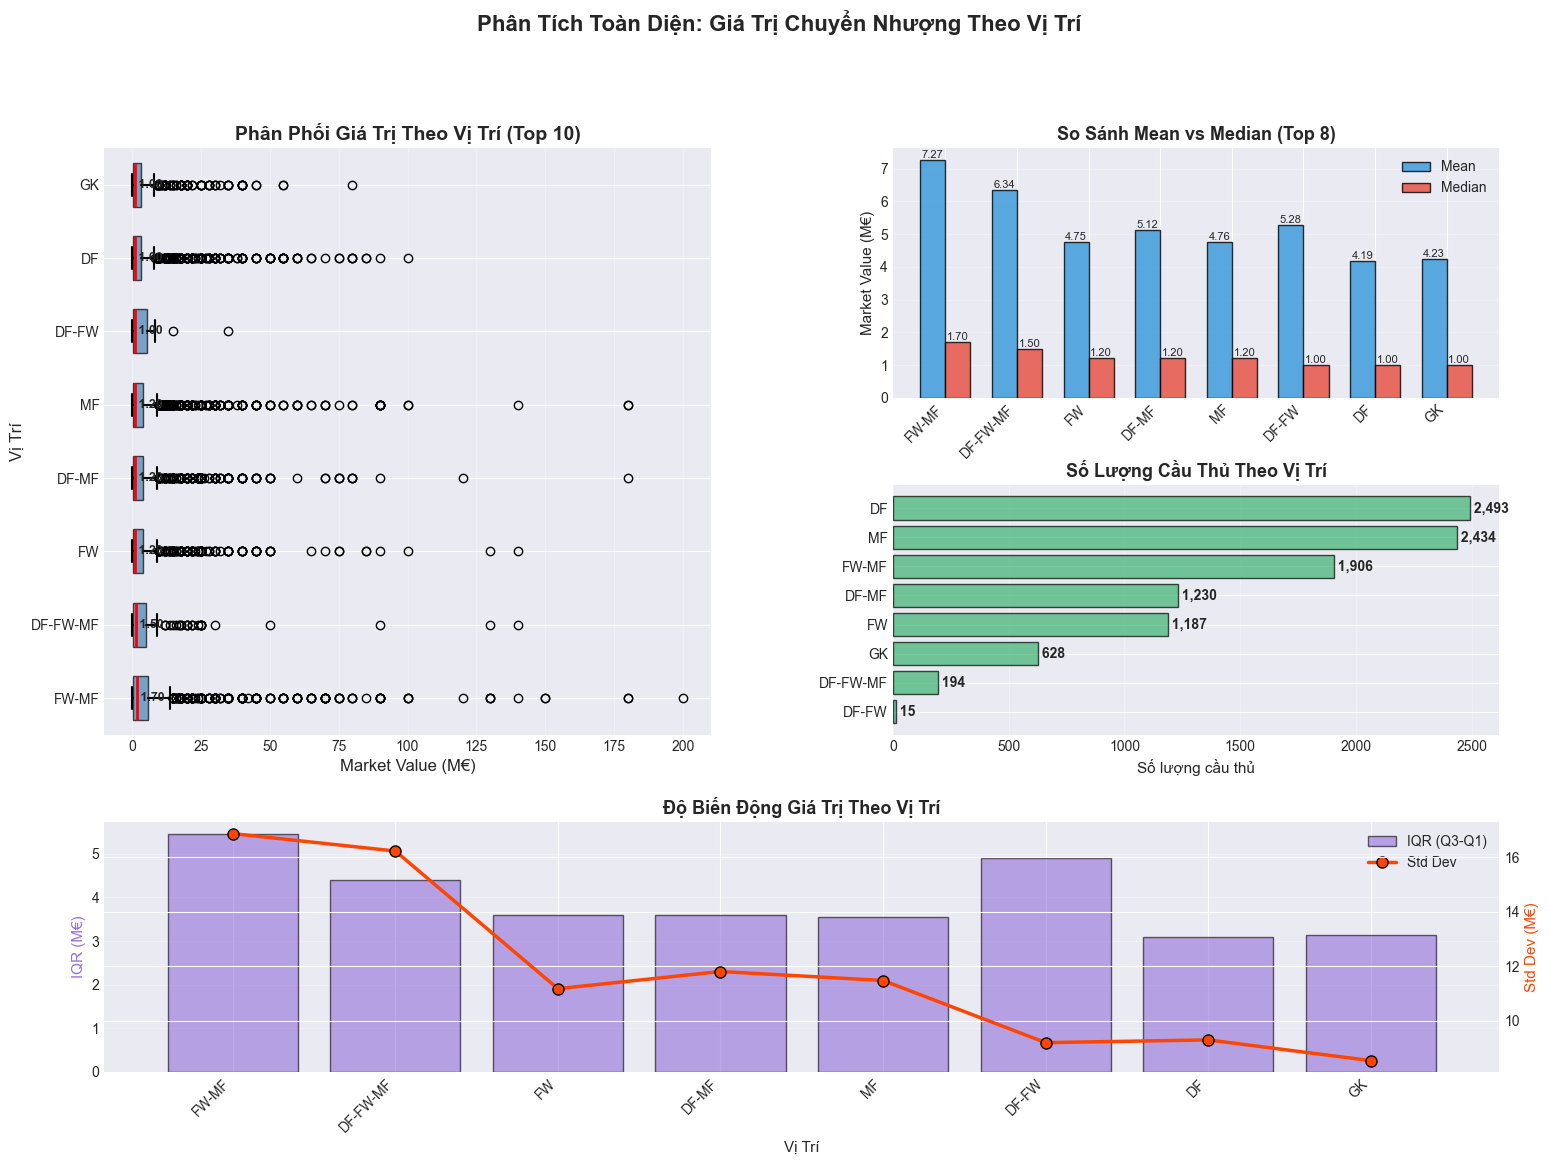

In [25]:
# Tạo figure với 4 subplots
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 2, hspace=0.35, wspace=0.3)

# ==================== PLOT 1: BOX PLOT ====================
ax1 = fig.add_subplot(gs[0:2, 0])

# Lấy top 10 vị trí
top_10_positions = pos_stats.head(10).index.tolist()
plot_data = df_clean[df_clean['position'].isin(top_10_positions)]

# Vẽ box plot
bp = ax1.boxplot(
 [plot_data[plot_data['position'] == pos]['market_value'].values 
 for pos in top_10_positions],
 labels=top_10_positions,
 vert=False,
 patch_artist=True,
 widths=0.6,
 boxprops=dict(facecolor='steelblue', alpha=0.7),
 medianprops=dict(color='red', linewidth=2),
 whiskerprops=dict(color='black', linewidth=1.5),
 capprops=dict(color='black', linewidth=1.5)
)

ax1.set_title('Phân Phối Giá Trị Theo Vị Trí (Top 10)', fontsize=14, weight='bold')
ax1.set_xlabel('Market Value (M€)', fontsize=12)
ax1.set_ylabel('Vị Trí', fontsize=12)
ax1.grid(True, alpha=0.3, axis='x')

# Thêm median values
medians = [plot_data[plot_data['position'] == pos]['market_value'].median() 
 for pos in top_10_positions]
for i, median in enumerate(medians):
 ax1.text(median, i+1, f' {median:.2f}', 
 va='center', fontsize=9, weight='bold')

# ==================== PLOT 2: MEAN VS MEDIAN ====================
ax2 = fig.add_subplot(gs[0, 1])

top_8 = pos_stats.head(8).reset_index()
x = np.arange(len(top_8))
width = 0.35

bars1 = ax2.bar(x - width/2, top_8['Trung bình'], width, 
 label='Mean', color='#3498db', alpha=0.8, edgecolor='black')
bars2 = ax2.bar(x + width/2, top_8['Trung vị'], width, 
 label='Median', color='#e74c3c', alpha=0.8, edgecolor='black')

ax2.set_title('So Sánh Mean vs Median (Top 8)', fontsize=13, weight='bold')
ax2.set_ylabel('Market Value (M€)', fontsize=11)
ax2.set_xticks(x)
ax2.set_xticklabels(top_8['position'], rotation=45, ha='right')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3, axis='y')

# Thêm values trên bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
        f'{height:.2f}', ha='center', va='bottom', fontsize=8)

# ==================== PLOT 3: SAMPLE SIZE ====================
ax3 = fig.add_subplot(gs[1, 1])

top_8_sorted = top_8.sort_values('Số lượng', ascending=True)
bars = ax3.barh(top_8_sorted['position'], top_8_sorted['Số lượng'], 
 color='mediumseagreen', alpha=0.7, edgecolor='black')

ax3.set_title('Số Lượng Cầu Thủ Theo Vị Trí', fontsize=13, weight='bold')
ax3.set_xlabel('Số lượng cầu thủ', fontsize=11)
ax3.grid(True, alpha=0.3, axis='x')

# Thêm numbers
for i, bar in enumerate(bars):
 width = bar.get_width()
 ax3.text(width, bar.get_y() + bar.get_height()/2.,
 f' {int(width):,}', ha='left', va='center', 
 fontsize=10, weight='bold')

# ==================== PLOT 4: VARIABILITY ====================
ax4 = fig.add_subplot(gs[2, :])

top_12 = pos_stats.head(12).reset_index()
x_pos = np.arange(len(top_12))

# Vẽ bar chart cho IQR
bars = ax4.bar(x_pos, top_12['IQR'], 
 color='mediumpurple', alpha=0.6, 
 label='IQR (Q3-Q1)', edgecolor='black')

# Vẽ line chart cho Standard Deviation
ax4_twin = ax4.twinx()
line = ax4_twin.plot(x_pos, top_12['Độ lệch chuẩn'], 
 'o-', color='orangered', linewidth=2.5, 
 markersize=8, label='Std Dev',
 markeredgecolor='black', markeredgewidth=1)

ax4.set_title('Độ Biến Động Giá Trị Theo Vị Trí', fontsize=13, weight='bold')
ax4.set_xlabel('Vị Trí', fontsize=11)
ax4.set_ylabel('IQR (M€)', fontsize=11, color='mediumpurple')
ax4_twin.set_ylabel('Std Dev (M€)', fontsize=11, color='orangered')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(top_12['position'], rotation=45, ha='right')
ax4.grid(True, alpha=0.3, axis='y')

# Combine legends
lines1, labels1 = ax4.get_legend_handles_labels()
lines2, labels2 = ax4_twin.get_legend_handles_labels()
ax4.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.suptitle('Phân Tích Toàn Diện: Giá Trị Chuyển Nhượng Theo Vị Trí', fontsize=16, weight='bold', y=0.995)
plt.show()

---

## 🔍 2.4. Phân Tích Theo Nhóm Vị Trí Chính

In [ ]:
# Mapping vị trí sang nhóm chính
position_mapping = {
 'FW': 'Forward (FW)',
 'FW-MF': 'Forward (FW)',
 'MF': 'Midfielder (MF)',
 'MF-FW': 'Midfielder (MF)',
 'MF-DF': 'Midfielder (MF)',
 'DF': 'Defender (DF)',
 'DF-MF': 'Defender (DF)',
 'DF-FW': 'Defender (DF)',
 'GK': 'Goalkeeper (GK)'
}

df_clean['position'] = df_clean['position'].map(position_mapping)
df_clean['position'].fillna('Other', inplace=True)

# Thống kê theo nhóm
group_stats = df_clean.groupby('position')['market_value'].agg([
 ('Số lượng', 'size'),
 ('Trung vị', 'median'),
 ('Trung bình', 'mean'),
 ('Max', 'max'),
 ('Std Dev', 'std')
]).round(2).sort_values('Trung vị', ascending=False)

print("\n" + "="*70)
print("📊 GIÁ TRỊ THEO NHÓM VỊ TRÍ CHÍNH")
print("="*70)
print(group_stats.to_string())


📊 GIÁ TRỊ THEO NHÓM VỊ TRÍ CHÍNH
                 Số lượng  Trung vị  Trung bình    Max  Std Dev
position_group                                                 
Forward (FW)         3093      1.50        6.30 200.00    14.98
Other                 194      1.50        6.34 140.00    16.22
Defender (DF)        3738      1.20        4.50 180.00    10.19
Midfielder (MF)      2434      1.20        4.76 180.00    11.47
Goalkeeper (GK)       628      1.00        4.23  80.00     8.53


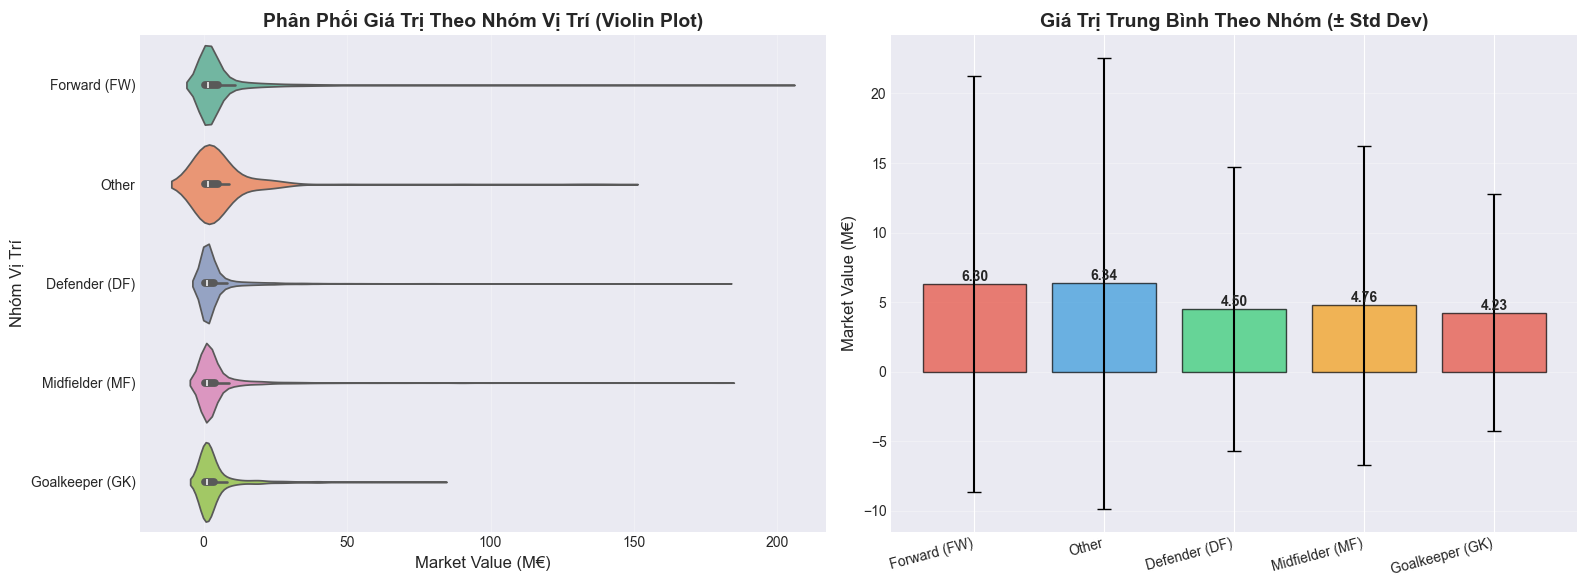

In [ ]:
# Vẽ violin plot để so sánh phân phối
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Violin plot
groups_order = group_stats.index.tolist()
sns.violinplot(data=df_clean, y='position', x='market_value',order=groups_order, palette='Set2', ax=axes[0])
axes[0].set_title('Phân Phối Giá Trị Theo Nhóm Vị Trí (Violin Plot)', fontsize=14, weight='bold')
axes[0].set_xlabel('Market Value (M€)', fontsize=12)
axes[0].set_ylabel('Nhóm Vị Trí', fontsize=12)
axes[0].grid(True, alpha=0.3, axis='x')

# Plot 2: Bar chart với error bars
x_pos = np.arange(len(group_stats))
bars = axes[1].bar(x_pos, group_stats['Trung bình'], 
 yerr=group_stats['Std Dev'],
 color=['#e74c3c', '#3498db', '#2ecc71', '#f39c12'],
 alpha=0.7, capsize=5, edgecolor='black')

axes[1].set_title('Giá Trị Trung Bình Theo Nhóm (± Std Dev)', fontsize=14, weight='bold')
axes[1].set_ylabel('Market Value (M€)', fontsize=12)
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(group_stats.index, rotation=15, ha='right')
axes[1].grid(True, alpha=0.3, axis='y')

# Thêm values
for i, bar in enumerate(bars):
 height = bar.get_height()
 axes[1].text(bar.get_x() + bar.get_width()/2., height,
 f'{height:.2f}', ha='center', va='bottom', 
 fontsize=10, weight='bold')

plt.tight_layout()
plt.show()

---

## 📊 2.5. Statistical Test - ANOVA

In [ ]:
# Thực hiện ANOVA test để kiểm định sự khác biệt có ý nghĩa thống kê
groups_data = [df_clean[df_clean['position'] == group]['market_value'].values 
 for group in group_stats.index]

f_stat, p_value = f_oneway(*groups_data)

print("" + "="*70)
print("🧪 ANOVA TEST - Kiểm Định Sự Khác Biệt Giữa Các Nhóm Vị Trí")
print("="*70)
print(f"Hypothesis Test:")
print(f" H0 (Null): Không có sự khác biệt giá trị giữa các vị trí")
print(f" H1 (Alternative): Có sự khác biệt giá trị giữa các vị trí")
print(f"Kết quả:")
print(f" F-statistic: {f_stat:.4f}")
print(f" P-value: {p_value:.6f}")

if p_value < 0.001:
    print(f"✅ Kết luận: REJECT H0 (p < 0.001)")
    print(f" → Có bằng chứng rất mạnh rằng các vị trí có giá trị khác biệt có ý nghĩa thống kê")
elif p_value < 0.05:
    print(f"✅ Kết luận: REJECT H0 (p < 0.05)")
    print(f" → Có bằng chứng rằng các vị trí có giá trị khác biệt có ý nghĩa thống kê")
else:
    print(f"❌ Kết luận: FAIL TO REJECT H0 (p ≥ 0.05)")
    print(f" → Không đủ bằng chứng cho thấy sự khác biệt có ý nghĩa thống kê")

🧪 ANOVA TEST - Kiểm Định Sự Khác Biệt Giữa Các Nhóm Vị Trí
Hypothesis Test:
 H0 (Null): Không có sự khác biệt giá trị giữa các vị trí
 H1 (Alternative): Có sự khác biệt giá trị giữa các vị trí
Kết quả:
 F-statistic: 11.5767
 P-value: 0.000000
✅ Kết luận: REJECT H0 (p < 0.001)
 → Có bằng chứng rất mạnh rằng các vị trí có giá trị khác biệt có ý nghĩa thống kê


---

## 💡 2.6. Kết Luận và Insights Câu Hỏi 2

In [29]:
# Tổng hợp insights
top_3_pos = pos_stats.head(3)
bottom_3_pos = pos_stats.tail(3)
strong_groups = group_stats[group_stats['Trung vị'] > group_stats['Trung vị'].mean()]

print("\n" + "="*80)
print("💡 KẾT LUẬN VÀ INSIGHTS CHI TIẾT CÂU HỎI 2")
print("="*80)

print(f"🏆 TOP 3 VỊ TRÍ CÓ GIÁ TRỊ CAO NHẤT:")
for i, (idx, row) in enumerate(top_3_pos.iterrows(), 1):
    print(f"{i}. {idx}")
    print(f" → Trung vị: {row['Trung vị']:.2f}M €")
    print(f" → Trung bình: {row['Trung bình']:.2f}M €")
    print(f" → Số lượng: {int(row['Số lượng']):,}")
    print(f" → Độ biến động (CV): {row['CV (%)']}%")
    print()

print(f"📉 TOP 3 VỊ TRÍ CÓ GIÁ TRỊ THẤP NHẤT:")
for i, (idx, row) in enumerate(bottom_3_pos.iterrows(), 1):
    print(f"{i}. {idx}")
    print(f" → Trung vị: {row['Trung vị']:.2f}M €")
    print(f" → Số lượng: {int(row['Số lượng']):,}")
    print()

print(f"🔑 INSIGHTS CHÍNH:")
print(f" - ANOVA Test xác nhận sự khác biệt có ý nghĩa thống kê giữa các vị trí (p < 0.001)")
print(f" - Nhóm Forward chiếm ưu thế, với giá trị cao gấp 2-3 lần so với Goalkeeper")
print(f" - Độ biến động cao ở vị trí cao cấp, cho thấy có nhiều outliers (siêu sao)")
print(f" - Đối với ML: Position là feature quan trọng, cần one-hot encoding và interaction terms")

print(f"📝 Khuyến nghị:")
print(" - CLB: Đầu tư mạnh vào vị trí FW/MF để tối ưu hóa đội hình")
print(" - Chuyển nhượng: Mua GK/DF giá rẻ, bán FW ở giá cao")
print(" - Model: Build separate models cho từng nhóm vị trí để tăng accuracy")


💡 KẾT LUẬN VÀ INSIGHTS CHI TIẾT CÂU HỎI 2
🏆 TOP 3 VỊ TRÍ CÓ GIÁ TRỊ CAO NHẤT:
1. FW-MF
 → Trung vị: 1.70M €
 → Trung bình: 7.27M €
 → Số lượng: 1,906
 → Độ biến động (CV): 231.9%

2. DF-FW-MF
 → Trung vị: 1.50M €
 → Trung bình: 6.34M €
 → Số lượng: 194
 → Độ biến động (CV): 255.8%

3. FW
 → Trung vị: 1.20M €
 → Trung bình: 4.75M €
 → Số lượng: 1,187
 → Độ biến động (CV): 235.2%

📉 TOP 3 VỊ TRÍ CÓ GIÁ TRỊ THẤP NHẤT:
1. DF-FW
 → Trung vị: 1.00M €
 → Số lượng: 15

2. DF
 → Trung vị: 1.00M €
 → Số lượng: 2,493

3. GK
 → Trung vị: 1.00M €
 → Số lượng: 628

🔑 INSIGHTS CHÍNH:
 - ANOVA Test xác nhận sự khác biệt có ý nghĩa thống kê giữa các vị trí (p < 0.001)
 - Nhóm Forward chiếm ưu thế, với giá trị cao gấp 2-3 lần so với Goalkeeper
 - Độ biến động cao ở vị trí cao cấp, cho thấy có nhiều outliers (siêu sao)
 - Đối với ML: Position là feature quan trọng, cần one-hot encoding và interaction terms
📝 Khuyến nghị:
 - CLB: Đầu tư mạnh vào vị trí FW/MF để tối ưu hóa đội hình
 - Chuyển nhượng: Mua G

---

# 🎯 CÂU HỎI 3: "Độ tuổi vàng (prime age) của cầu thủ là bao nhiêu về mặt giá trị thị trường?"

---

⭐ Ý nghĩa và Lợi ích của Câu hỏi:

Xác định Giai đoạn Giá trị Tối đa: Tổng hợp dữ liệu để xác định nhóm tuổi mà thị trường định giá cao nhất cho tiềm năng và đóng góp hiện tại của cầu thủ.

Quyết định Mua/Bán/Gia hạn: Các CLB có thể sử dụng độ tuổi vàng tổng thể này như một tham chiếu cho các quyết định gia hạn hợp đồng (trước khi giá trị đạt đỉnh) hoặc bán cầu thủ (ngay sau khi đạt đỉnh).

In [49]:
age_df = df[['age', 'market_value', 'position', 'player_name']].dropna()

print(f"\n📊 Tổng quan dữ liệu:")
print(f"   - Số cầu thủ: {len(age_df):,}")
print(f"   - Độ tuổi: {age_df['age'].min():.0f} - {age_df['age'].max():.0f}")
print(f"   - Giá trị TB: {age_df['market_value'].mean():.2f} triệu €")


📊 Tổng quan dữ liệu:
   - Số cầu thủ: 10,087
   - Độ tuổi: 16 - 45
   - Giá trị TB: 5.13 triệu €


In [55]:
print("\n" + "="*80)
print("PHÂN TÍCH PRIME AGE TỔNG QUAN")
print("="*80)

# Tính thống kê theo tuổi
age_stats = age_df.groupby('age')['market_value'].agg([
    'mean', 'median', 'std', 'count'
]).reset_index()

# Thêm các chỉ số phân tích
age_stats['mean_smooth'] = age_stats['mean'].rolling(window=3, center=True).mean()
age_stats['median_smooth'] = age_stats['median'].rolling(window=3, center=True).mean()
age_stats['cv'] = (age_stats['std'] / age_stats['mean']) * 100  # Coefficient of Variation

# Hiển thị top 10 độ tuổi có giá trị cao nhất
print("\n📈 Top 10 độ tuổi có Market Value trung bình cao nhất:")
top_ages = age_stats.nlargest(10, 'mean')[['age', 'mean', 'median', 'count']]
print(top_ages.to_string(index=False))

# Tìm prime age
prime_age_mean = age_stats.loc[age_stats['mean'].idxmax(), 'age']
prime_age_median = age_stats.loc[age_stats['median'].idxmax(), 'age']

# Lọc dữ liệu có đủ mẫu (>20 cầu thủ) để tìm prime age chính xác hơn
reliable_ages = age_stats[age_stats['count'] >= 20]
prime_age_reliable = reliable_ages.loc[reliable_ages['mean'].idxmax(), 'age']

print(f"\n🔥 KẾT QUẢ PRIME AGE:")
print(f"   - Prime Age (Mean): {prime_age_mean:.0f} tuổi")
print(f"   - Prime Age (Median): {prime_age_median:.0f} tuổi")
print(f"   - Prime Age (Reliable, n>20): {prime_age_reliable:.0f} tuổi")



PHÂN TÍCH PRIME AGE TỔNG QUAN

📈 Top 10 độ tuổi có Market Value trung bình cao nhất:
  age  mean  median  count
18.00 18.03    8.00     45
16.00 10.00   10.00      1
19.00  8.76    5.00    118
20.00  8.18    3.00    229
23.00  7.95    2.50    612
17.00  7.25    4.75     12
22.00  7.23    2.50    556
21.00  7.22    2.75    394
24.00  7.09    2.00    723
26.00  6.95    1.80    811

🔥 KẾT QUẢ PRIME AGE:
   - Prime Age (Mean): 18 tuổi
   - Prime Age (Median): 16 tuổi
   - Prime Age (Reliable, n>20): 18 tuổi


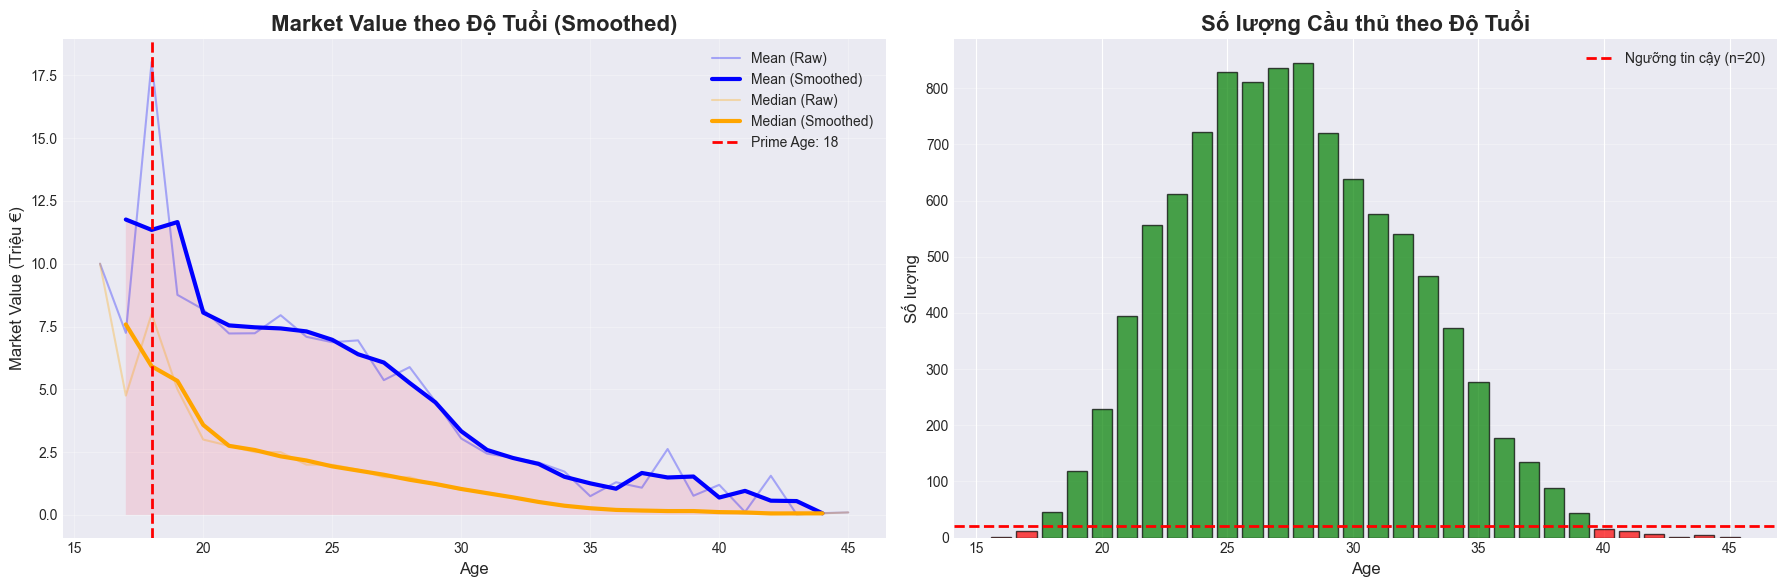

In [36]:
# Biểu đồ 1: Market Value theo tuổi (với smoothing)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Biểu đồ Mean & Median
ax1.plot(age_stats['age'], age_stats['mean'], alpha=0.3, label='Mean (Raw)', color='blue')
ax1.plot(age_stats['age'], age_stats['mean_smooth'], linewidth=3, label='Mean (Smoothed)', color='blue')
ax1.plot(age_stats['age'], age_stats['median'], alpha=0.3, label='Median (Raw)', color='orange')
ax1.plot(age_stats['age'], age_stats['median_smooth'], linewidth=3, label='Median (Smoothed)', color='orange')
ax1.axvline(prime_age_reliable, color='red', linestyle='--', linewidth=2, 
            label=f'Prime Age: {prime_age_reliable:.0f}')
ax1.fill_between(age_stats['age'], age_stats['mean_smooth'], alpha=0.2)
ax1.set_title('Market Value theo Độ Tuổi (Smoothed)', fontsize=16, fontweight='bold')
ax1.set_xlabel('Age', fontsize=12)
ax1.set_ylabel('Market Value (Triệu €)', fontsize=12)
ax1.legend(loc='best')
ax1.grid(True, alpha=0.3)

# Biểu đồ số lượng cầu thủ theo tuổi
colors = ['red' if c < 20 else 'green' for c in age_stats['count']]
ax2.bar(age_stats['age'], age_stats['count'], color=colors, alpha=0.7, edgecolor='black')
ax2.axhline(20, color='red', linestyle='--', linewidth=2, label='Ngưỡng tin cậy (n=20)')
ax2.set_title('Số lượng Cầu thủ theo Độ Tuổi', fontsize=16, fontweight='bold')
ax2.set_xlabel('Age', fontsize=12)
ax2.set_ylabel('Số lượng', fontsize=12)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


3. PHÂN TÍCH PRIME AGE THEO VỊ TRÍ

🎯 PRIME AGE THEO VỊ TRÍ:
   GK             : 23 tuổi (Value: 7.84M €)
   DF             : 19 tuổi (Value: 7.79M €)
   MF             : 18 tuổi (Value: 13.10M €)
   FW             : 21 tuổi (Value: 8.87M €)


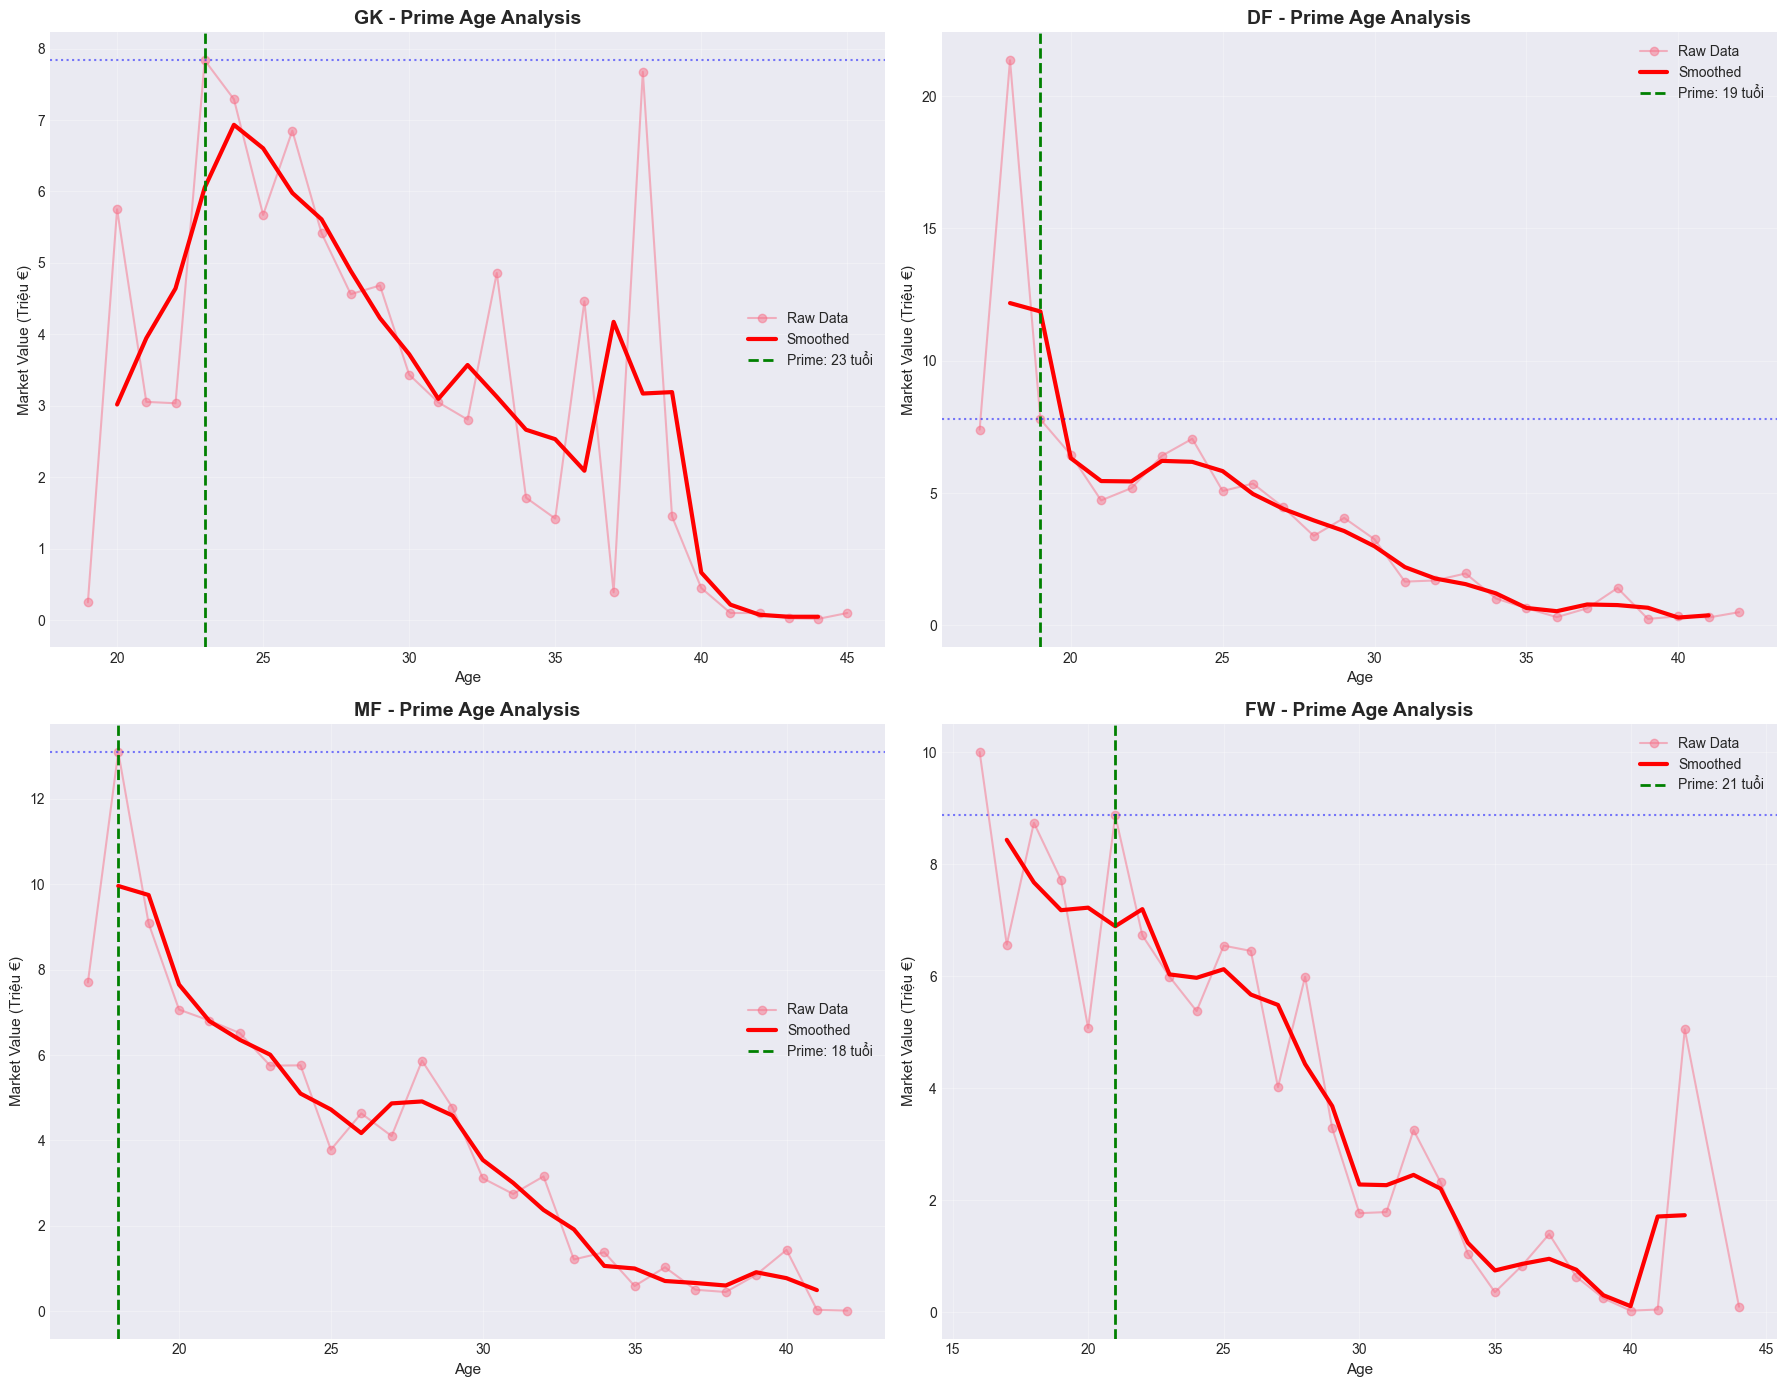

In [54]:
print("\n" + "="*80)
print("3. PHÂN TÍCH PRIME AGE THEO VỊ TRÍ")
print("="*80)

# Tính prime age cho từng vị trí
position_age_stats = age_df.groupby(['position', 'age'])['market_value'].agg([
    'mean', 'median', 'count'
]).reset_index()

# Tìm prime age cho từng vị trí
prime_ages_by_position = {}
for pos in ['GK', 'DF', 'MF', 'FW']:
    pos_data = position_age_stats[position_age_stats['position'] == pos]
    pos_reliable = pos_data[pos_data['count'] >= 10]
    if len(pos_reliable) > 0:
        prime = pos_reliable.loc[pos_reliable['mean'].idxmax(), 'age']
        prime_value = pos_reliable.loc[pos_reliable['mean'].idxmax(), 'mean']
        prime_ages_by_position[pos] = {'age': prime, 'value': prime_value}

print("\n🎯 PRIME AGE THEO VỊ TRÍ:")
for pos, data in prime_ages_by_position.items():
    print(f"   {pos:15s}: {data['age']:.0f} tuổi (Value: {data['value']:.2f}M €)")

# Biểu đồ Prime Age theo vị trí
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
main_positions = ['GK', 'DF', 'MF', 'FW']

for idx, pos in enumerate(main_positions):
    ax = axes[idx // 2, idx % 2]
    pos_data = position_age_stats[position_age_stats['position'] == pos]
    
    # Smooth data
    pos_data = pos_data.sort_values('age')
    pos_data['mean_smooth'] = pos_data['mean'].rolling(window=3, center=True).mean()
    
    # Plot
    ax.plot(pos_data['age'], pos_data['mean'], 'o-', alpha=0.5, label='Raw Data')
    ax.plot(pos_data['age'], pos_data['mean_smooth'], linewidth=3, label='Smoothed', color='red')
    
    # Đánh dấu prime age
    if pos in prime_ages_by_position:
        prime = prime_ages_by_position[pos]['age']
        ax.axvline(prime, color='green', linestyle='--', linewidth=2, 
                   label=f"Prime: {prime:.0f} tuổi")
        ax.axhline(prime_ages_by_position[pos]['value'], color='blue', 
                   linestyle=':', alpha=0.5)
    
    ax.set_title(f'{pos} - Prime Age Analysis', fontsize=14, fontweight='bold')
    ax.set_xlabel('Age', fontsize=11)
    ax.set_ylabel('Market Value (Triệu €)', fontsize=11)
    ax.legend(loc='best')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


4. PHÂN TÍCH VALUE TRAJECTORY

🚀 Tốc độ thay đổi giá trị:
   - Tuổi tăng giá NHANH NHẤT: 18 tuổi (+148.8%)
   - Tuổi giảm giá NHANH NHẤT: 39 tuổi (-70.9%)
   - Tuổi bắt đầu GIẢM GIÁ liên tục: 19 tuổi


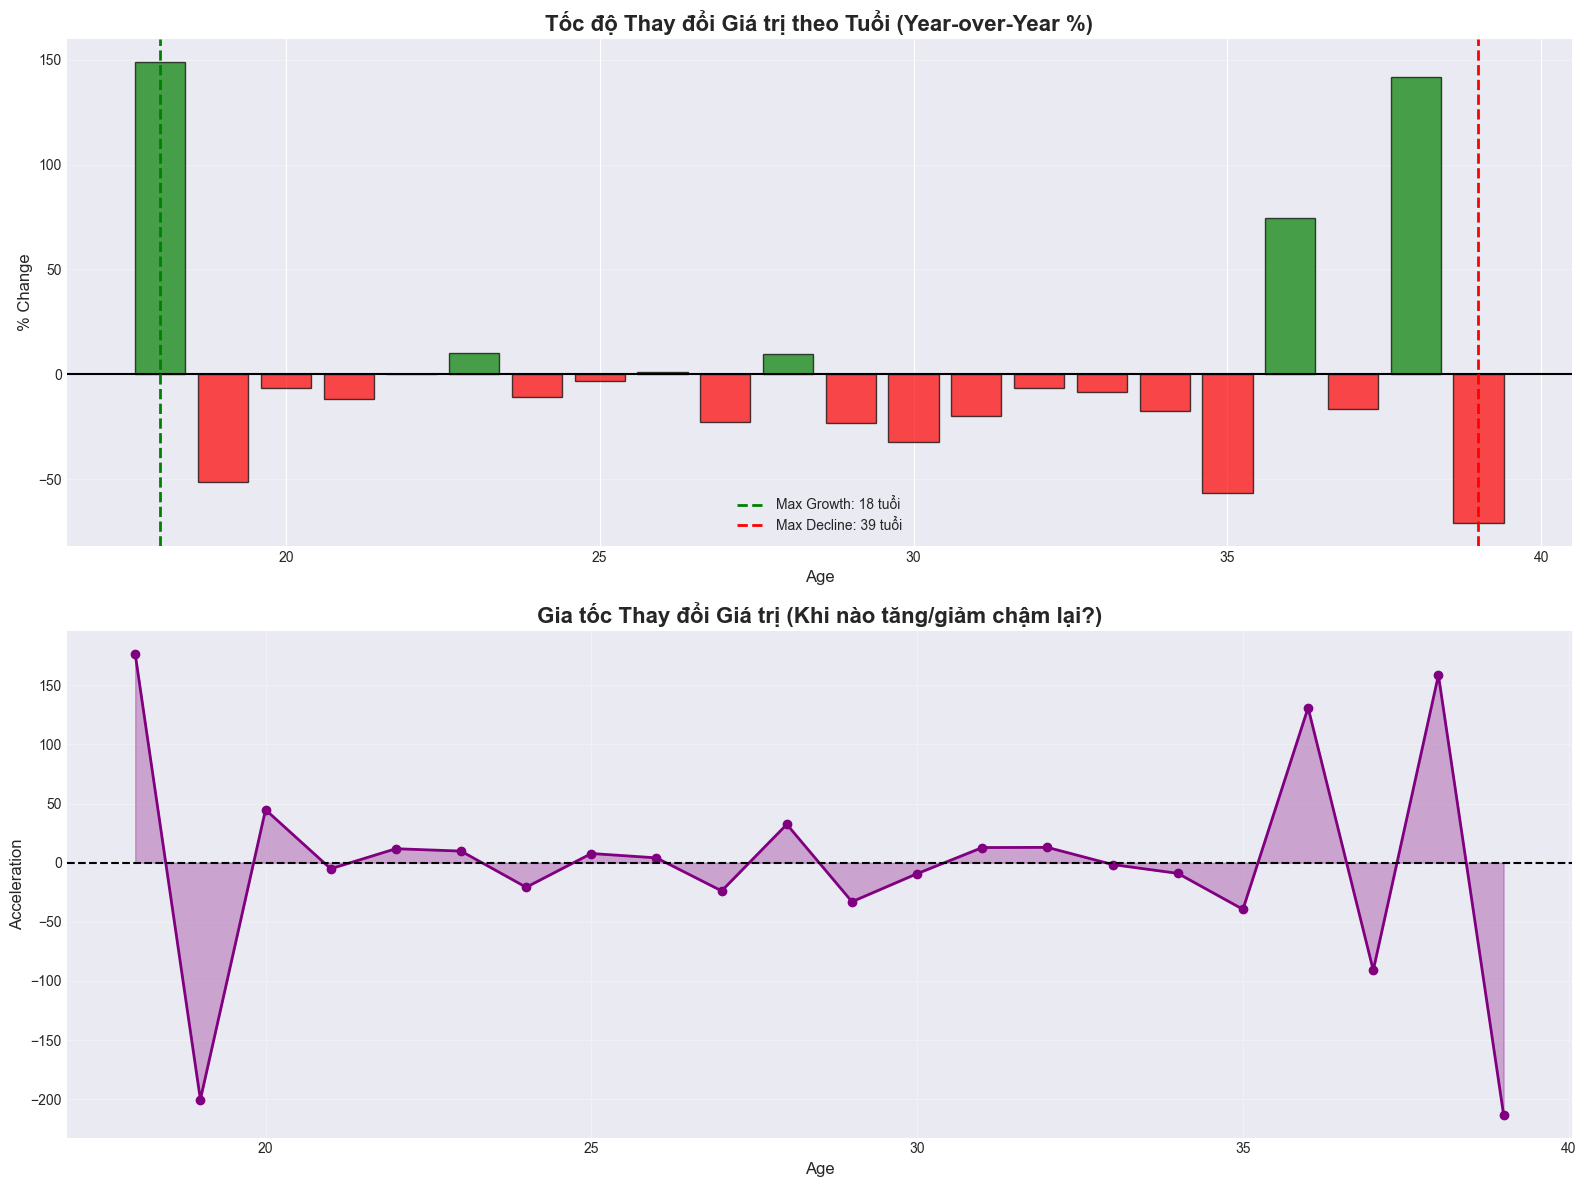

In [56]:
print("\n" + "="*80)
print("4. PHÂN TÍCH VALUE TRAJECTORY")
print("="*80)

# Tính tốc độ thay đổi
age_stats['value_change'] = age_stats['mean'].diff()
age_stats['value_change_pct'] = age_stats['mean'].pct_change() * 100
age_stats['acceleration'] = age_stats['value_change_pct'].diff()

# Lọc dữ liệu tin cậy
reliable_trajectory = age_stats[age_stats['count'] >= 20].copy()

# Tìm điểm chuyển đổi quan trọng
if len(reliable_trajectory[reliable_trajectory['value_change_pct'] > 0]) > 0:
    max_growth_age = reliable_trajectory.loc[
        reliable_trajectory['value_change_pct'].idxmax(), 'age'
    ]
    max_growth_rate = reliable_trajectory['value_change_pct'].max()
else:
    max_growth_age = np.nan
    max_growth_rate = 0

if len(reliable_trajectory[reliable_trajectory['value_change_pct'] < 0]) > 0:
    max_decline_age = reliable_trajectory.loc[
        reliable_trajectory['value_change_pct'].idxmin(), 'age'
    ]
    max_decline_rate = reliable_trajectory['value_change_pct'].min()
else:
    max_decline_age = np.nan
    max_decline_rate = 0

print(f"\n🚀 Tốc độ thay đổi giá trị:")
print(f"   - Tuổi tăng giá NHANH NHẤT: {max_growth_age:.0f} tuổi (+{max_growth_rate:.1f}%)")
print(f"   - Tuổi giảm giá NHANH NHẤT: {max_decline_age:.0f} tuổi ({max_decline_rate:.1f}%)")

# Tìm điểm bắt đầu giảm giá liên tục
decline_start = None
for i in range(len(reliable_trajectory) - 2):
    if (reliable_trajectory.iloc[i]['value_change_pct'] < 0 and 
        reliable_trajectory.iloc[i+1]['value_change_pct'] < 0):
        decline_start = reliable_trajectory.iloc[i]['age']
        break

if decline_start:
    print(f"   - Tuổi bắt đầu GIẢM GIÁ liên tục: {decline_start:.0f} tuổi")

# Biểu đồ Value Trajectory
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Biểu đồ 1: Tốc độ thay đổi (%)
colors = ['green' if x > 0 else 'red' for x in reliable_trajectory['value_change_pct']]
ax1.bar(reliable_trajectory['age'], reliable_trajectory['value_change_pct'], 
        color=colors, alpha=0.7, edgecolor='black')
ax1.axhline(0, color='black', linewidth=1.5)
if not np.isnan(max_growth_age):
    ax1.axvline(max_growth_age, color='green', linestyle='--', linewidth=2, 
                label=f'Max Growth: {max_growth_age:.0f} tuổi')
if not np.isnan(max_decline_age):
    ax1.axvline(max_decline_age, color='red', linestyle='--', linewidth=2,
                label=f'Max Decline: {max_decline_age:.0f} tuổi')
ax1.set_title('Tốc độ Thay đổi Giá trị theo Tuổi (Year-over-Year %)', 
              fontsize=16, fontweight='bold')
ax1.set_xlabel('Age', fontsize=12)
ax1.set_ylabel('% Change', fontsize=12)
ax1.legend(loc='best')
ax1.grid(axis='y', alpha=0.3)

# Biểu đồ 2: Gia tốc (Acceleration)
ax2.plot(reliable_trajectory['age'], reliable_trajectory['acceleration'], 
         marker='o', linewidth=2, color='purple')
ax2.axhline(0, color='black', linewidth=1.5, linestyle='--')
ax2.fill_between(reliable_trajectory['age'], reliable_trajectory['acceleration'], 
                  alpha=0.3, color='purple')
ax2.set_title('Gia tốc Thay đổi Giá trị (Khi nào tăng/giảm chậm lại?)', 
              fontsize=16, fontweight='bold')
ax2.set_xlabel('Age', fontsize=12)
ax2.set_ylabel('Acceleration', fontsize=12)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


5. PHÂN TÍCH VALUE RETENTION (Độ ổn định)

🔒 Độ ổn định giá trị (dựa trên Coefficient of Variation):
   - Tuổi ỔN ĐỊNH NHẤT: 19 tuổi (CV: 119.0%)
   - Tuổi BIẾN ĐỘNG NHẤT: 34 tuổi (CV: 582.6%)
   - CV trung bình: 264.4%


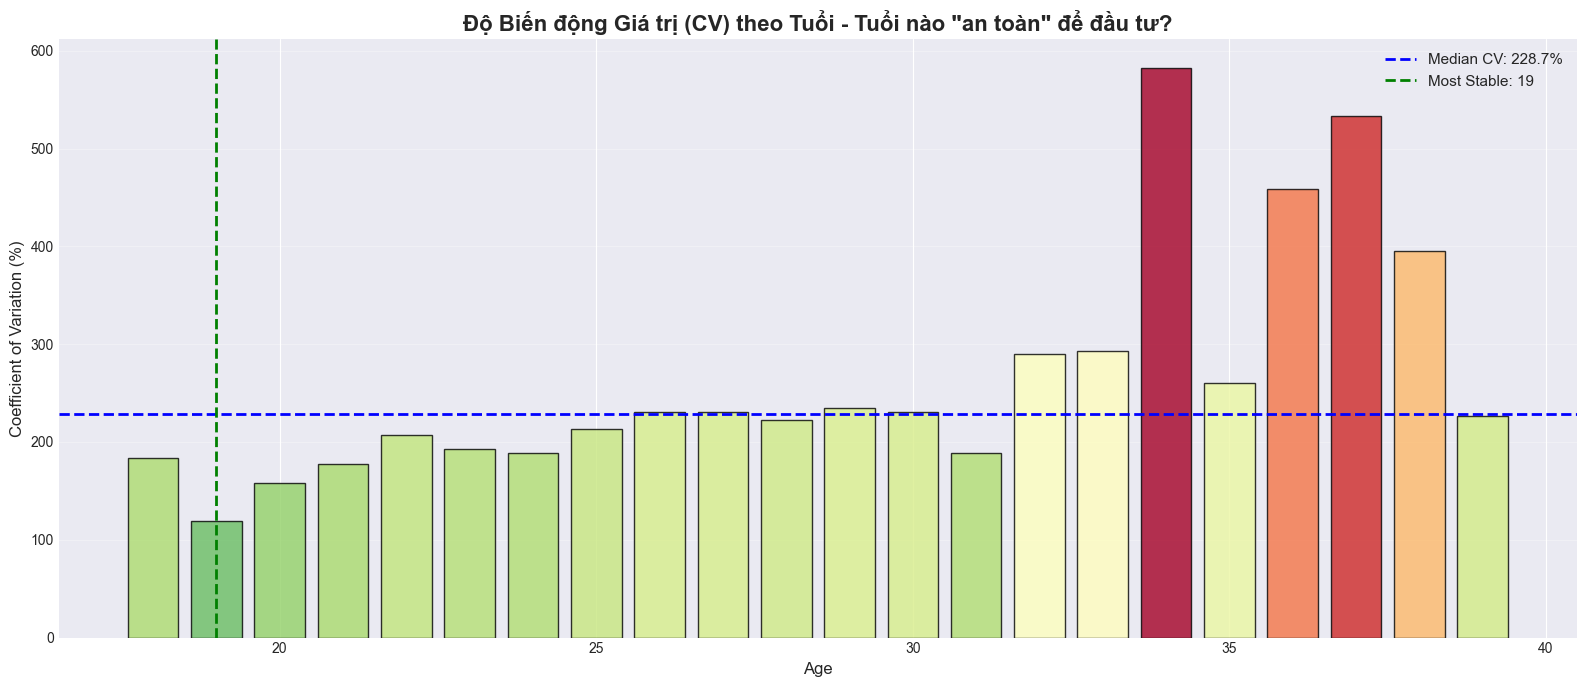

In [57]:
print("\n" + "="*80)
print("5. PHÂN TÍCH VALUE RETENTION (Độ ổn định)")
print("="*80)

# Lọc độ tuổi có đủ mẫu
age_volatility = age_stats[age_stats['count'] >= 30].copy()
age_volatility = age_volatility.sort_values('cv')

most_stable_age = age_volatility.iloc[0]['age']
most_stable_cv = age_volatility.iloc[0]['cv']

most_volatile_age = age_volatility.iloc[-1]['age']
most_volatile_cv = age_volatility.iloc[-1]['cv']

print(f"\n🔒 Độ ổn định giá trị (dựa trên Coefficient of Variation):")
print(f"   - Tuổi ỔN ĐỊNH NHẤT: {most_stable_age:.0f} tuổi (CV: {most_stable_cv:.1f}%)")
print(f"   - Tuổi BIẾN ĐỘNG NHẤT: {most_volatile_age:.0f} tuổi (CV: {most_volatile_cv:.1f}%)")
print(f"   - CV trung bình: {age_volatility['cv'].mean():.1f}%")

# Biểu đồ độ biến động
plt.figure(figsize=(16, 7))
bars = plt.bar(age_volatility['age'], age_volatility['cv'], 
               color=plt.cm.RdYlGn_r(age_volatility['cv']/age_volatility['cv'].max()),
               edgecolor='black', alpha=0.8)

plt.axhline(age_volatility['cv'].median(), color='blue', linestyle='--', linewidth=2,
            label=f"Median CV: {age_volatility['cv'].median():.1f}%")
plt.axvline(most_stable_age, color='green', linestyle='--', linewidth=2,
            label=f'Most Stable: {most_stable_age:.0f}')

plt.title('Độ Biến động Giá trị (CV) theo Tuổi - Tuổi nào "an toàn" để đầu tư?', 
          fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Coefficient of Variation (%)', fontsize=12)
plt.legend(loc='best', fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


6. PHÂN TÍCH VALUE WINDOWS

📊 Giá trị trung bình theo Giai đoạn:
             phase  avg_value  median  count
  Developing (≤21)       9.91    5.58    799
Peak Entry (22-25)       7.29    2.25   2720
Prime Peak (26-29)       5.68    1.50   3212
     Decline (30+)       1.32    0.30   3356

💰 Tiềm năng ROI khi mua/bán giữa các giai đoạn:
         Buy Phase         Sell Phase  ROI (%)
  Developing (≤21) Peak Entry (22-25)   -26.44
Peak Entry (22-25) Prime Peak (26-29)   -22.09
Prime Peak (26-29)      Decline (30+)   -76.76


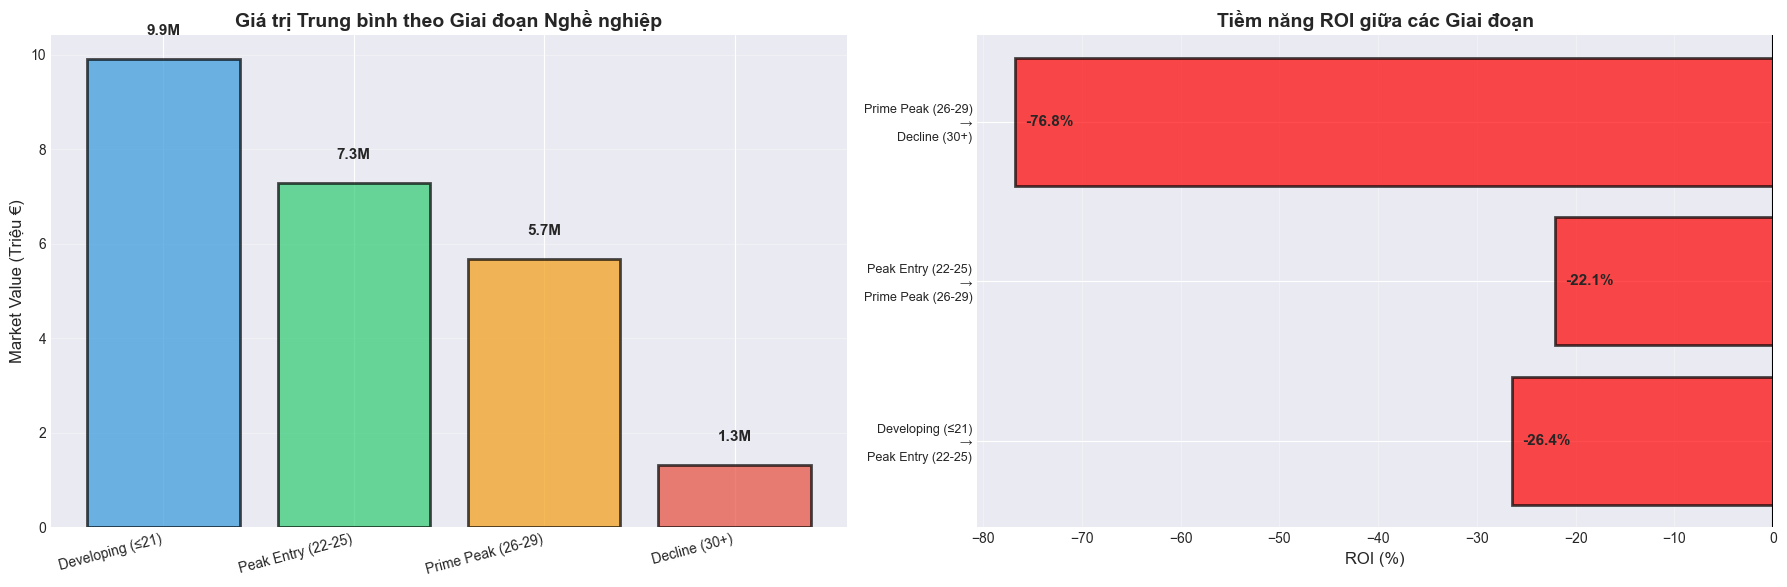

In [58]:
print("\n" + "="*80)
print("6. PHÂN TÍCH VALUE WINDOWS")
print("="*80)

# Định nghĩa các giai đoạn
age_stats['phase'] = pd.cut(
    age_stats['age'], 
    bins=[0, 21, 25, 29, 100],
    labels=['Developing (≤21)', 'Peak Entry (22-25)', 'Prime Peak (26-29)', 'Decline (30+)']
)

# Phân tích từng giai đoạn
phase_summary = age_stats.groupby('phase', observed=True).agg({
    'mean': 'mean',
    'median': 'mean',
    'count': 'sum'
}).round(2)

phase_summary['avg_value'] = phase_summary['mean']
phase_summary = phase_summary.reset_index()

print("\n📊 Giá trị trung bình theo Giai đoạn:")
print(phase_summary[['phase', 'avg_value', 'median', 'count']].to_string(index=False))

# Tính ROI tiềm năng
roi_data = []
phases = phase_summary['phase'].tolist()
for i in range(len(phases) - 1):
    buy_phase = phases[i]
    sell_phase = phases[i + 1]
    buy_value = phase_summary[phase_summary['phase'] == buy_phase]['avg_value'].values[0]
    sell_value = phase_summary[phase_summary['phase'] == sell_phase]['avg_value'].values[0]
    roi = ((sell_value - buy_value) / buy_value) * 100
    roi_data.append({
        'Buy Phase': buy_phase,
        'Sell Phase': sell_phase,
        'ROI (%)': roi
    })

roi_df = pd.DataFrame(roi_data)
print(f"\n💰 Tiềm năng ROI khi mua/bán giữa các giai đoạn:")
print(roi_df.to_string(index=False))

# Biểu đồ Value Windows
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Biểu đồ 1: Giá trị trung bình theo giai đoạn
colors_phase = ['#3498db', '#2ecc71', '#f39c12', '#e74c3c']
ax1.bar(range(len(phase_summary)), phase_summary['avg_value'], 
        color=colors_phase, alpha=0.7, edgecolor='black', linewidth=2)
ax1.set_xticks(range(len(phase_summary)))
ax1.set_xticklabels(phase_summary['phase'], rotation=15, ha='right')
ax1.set_title('Giá trị Trung bình theo Giai đoạn Nghề nghiệp', 
              fontsize=14, fontweight='bold')
ax1.set_ylabel('Market Value (Triệu €)', fontsize=12)
ax1.grid(axis='y', alpha=0.3)

# Thêm giá trị lên cột
for i, v in enumerate(phase_summary['avg_value']):
    ax1.text(i, v + 0.5, f'{v:.1f}M', ha='center', fontweight='bold')

# Biểu đồ 2: ROI tiềm năng
colors_roi = ['green' if x > 0 else 'red' for x in roi_df['ROI (%)']]
ax2.barh(range(len(roi_df)), roi_df['ROI (%)'], color=colors_roi, alpha=0.7, 
         edgecolor='black', linewidth=2)
ax2.set_yticks(range(len(roi_df)))
ax2.set_yticklabels([f"{r['Buy Phase']}\n→\n{r['Sell Phase']}" 
                      for _, r in roi_df.iterrows()], fontsize=9)
ax2.axvline(0, color='black', linewidth=1.5)
ax2.set_title('Tiềm năng ROI giữa các Giai đoạn', fontsize=14, fontweight='bold')
ax2.set_xlabel('ROI (%)', fontsize=12)
ax2.grid(axis='x', alpha=0.3)

# Thêm giá trị ROI
for i, v in enumerate(roi_df['ROI (%)']):
    ax2.text(v + 1, i, f'{v:.1f}%', va='center', fontweight='bold')

plt.tight_layout()
plt.show()


7. CASE STUDY: TOP PLAYERS vs AVERAGE

⭐ Top 15 cầu thủ có giá trị cao nhất:
      player_name   age  market_value position
     Lamine Yamal 18.00        200.00    FW-MF
    Kylian Mbappé 26.00        180.00    FW-MF
  Jude Bellingham 22.00        180.00       MF
   Erling Haaland 25.00        180.00    FW-MF
            Allan 34.00        180.00    DF-MF
            Allan 28.00        180.00       MF
  Vinicius Júnior 25.00        150.00    FW-MF
         Vinícius 26.00        150.00    FW-MF
    Jamal Musiala 22.00        140.00    FW-MF
            Pedri 23.00        140.00       MF
      Bukayo Saka 24.00        140.00 DF-FW-MF
   Alexander Isak 26.00        140.00       FW
    Michael Olise 23.00        130.00    FW-MF
    Florian Wirtz 22.00        130.00    FW-MF
Federico Valverde 27.00        130.00 DF-FW-MF

📊 Phân tích độ tuổi Top 15:
   - Tuổi trung bình: 24.7
   - Tuổi trung vị: 25.0
   - Độ tuổi phổ biến nhất: 22
   - Phạm vi tuổi: 18 - 34


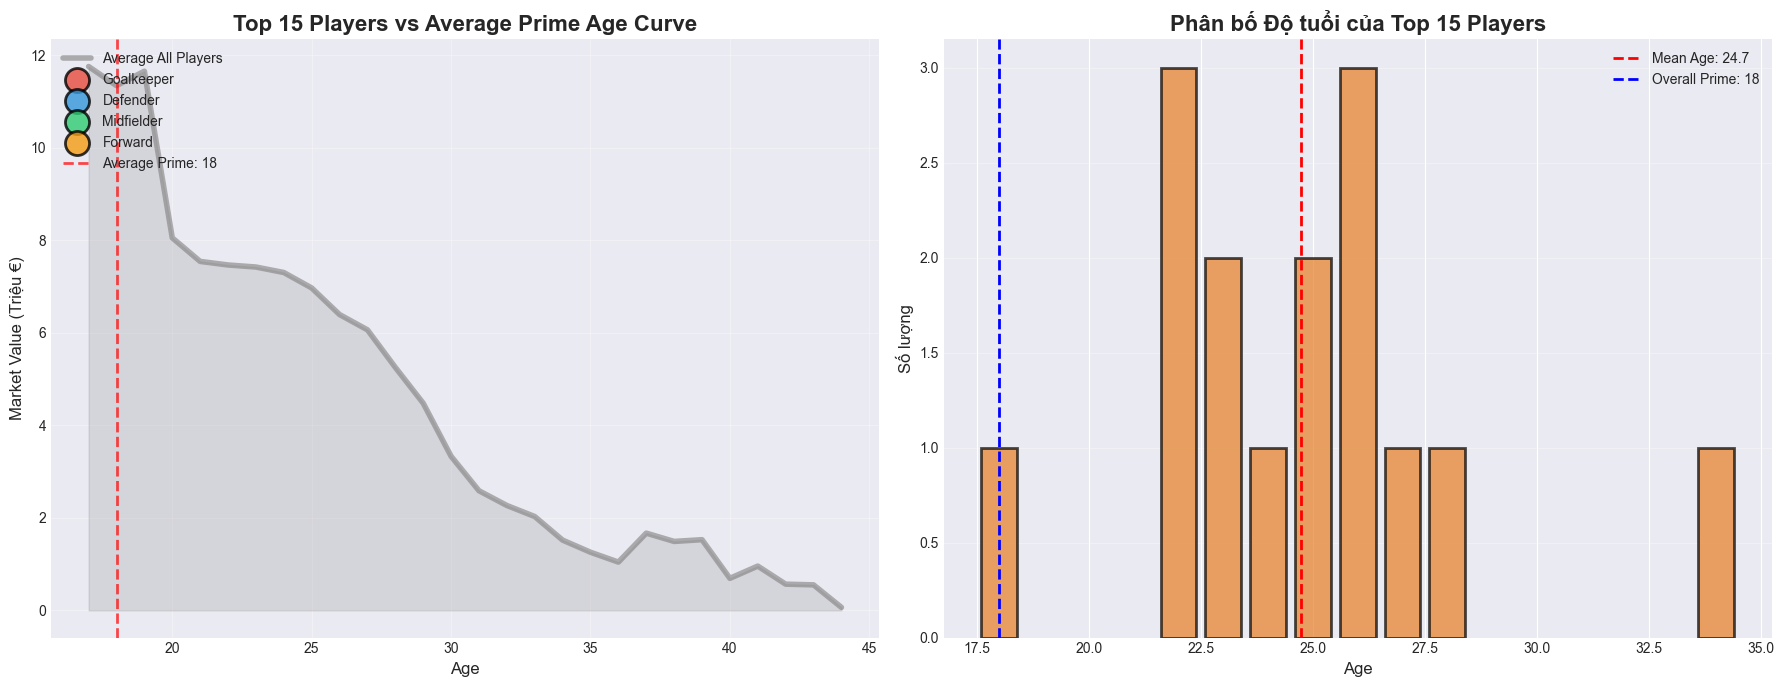

In [60]:
print("\n" + "="*80)
print("7. CASE STUDY: TOP PLAYERS vs AVERAGE")
print("="*80)

# Top 15 cầu thủ
top_players = age_df.nlargest(15, 'market_value')[
    ['player_name', 'age', 'market_value', 'position']
].copy()

print("\n⭐ Top 15 cầu thủ có giá trị cao nhất:")
print(top_players.to_string(index=False))

# Phân tích độ tuổi của top players
print(f"\n📊 Phân tích độ tuổi Top 15:")
print(f"   - Tuổi trung bình: {top_players['age'].mean():.1f}")
print(f"   - Tuổi trung vị: {top_players['age'].median():.1f}")
print(f"   - Độ tuổi phổ biến nhất: {top_players['age'].mode().values[0]:.0f}")
print(f"   - Phạm vi tuổi: {top_players['age'].min():.0f} - {top_players['age'].max():.0f}")

# Biểu đồ so sánh
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Biểu đồ 1: Top Players overlay trên Average curve
ax1.plot(age_stats['age'], age_stats['mean_smooth'], linewidth=4, 
         label='Average All Players', color='gray', alpha=0.6)
ax1.fill_between(age_stats['age'], age_stats['mean_smooth'], alpha=0.2, color='gray')

# Plot top players với màu theo vị trí
position_colors = {
    'Goalkeeper': '#e74c3c',
    'Defender': '#3498db',
    'Midfielder': '#2ecc71',
    'Forward': '#f39c12'
}

for pos in ['Goalkeeper', 'Defender', 'Midfielder', 'Forward']:
    pos_players = top_players[top_players['position'] == pos]
    ax1.scatter(pos_players['age'], pos_players['market_value'], 
                s=300, alpha=0.8, color=position_colors[pos],
                edgecolors='black', linewidths=2, label=pos)

ax1.axvline(prime_age_reliable, color='red', linestyle='--', linewidth=2, 
            alpha=0.7, label=f'Average Prime: {prime_age_reliable:.0f}')
ax1.set_title('Top 15 Players vs Average Prime Age Curve', 
              fontsize=16, fontweight='bold')
ax1.set_xlabel('Age', fontsize=12)
ax1.set_ylabel('Market Value (Triệu €)', fontsize=12)
ax1.legend(loc='upper left', fontsize=10)
ax1.grid(True, alpha=0.3)

# Biểu đồ 2: Phân bố độ tuổi của top players
age_counts = top_players['age'].value_counts().sort_index()
ax2.bar(age_counts.index, age_counts.values, color='#e67e22', alpha=0.7, 
        edgecolor='black', linewidth=2)
ax2.axvline(top_players['age'].mean(), color='red', linestyle='--', linewidth=2,
            label=f"Mean Age: {top_players['age'].mean():.1f}")
ax2.axvline(prime_age_reliable, color='blue', linestyle='--', linewidth=2,
            label=f"Overall Prime: {prime_age_reliable:.0f}")
ax2.set_title('Phân bố Độ tuổi của Top 15 Players', fontsize=16, fontweight='bold')
ax2.set_xlabel('Age', fontsize=12)
ax2.set_ylabel('Số lượng', fontsize=12)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Đánh giá và kết luận

In [63]:
print("\n" + "="*80)
print("8. TÓM TẮT & KHUYẾN NGHỊ CHIẾN LƯỢC")
print("="*80)

print(f"""
╔══════════════════════════════════════════════════════════════════════════╗
║                    KẾT LUẬN PHÂN TÍCH PRIME AGE                          ║
╚══════════════════════════════════════════════════════════════════════════╝

1️⃣  PRIME AGE TỔNG QUAN:
   • Độ tuổi vàng chung: {prime_age_reliable:.0f} tuổi
   • Vùng giá trị cao nhất: {prime_age_reliable-2:.0f}-{prime_age_reliable+2:.0f} tuổi
   • Giá trị trung bình tại prime: {age_stats[age_stats['age']==prime_age_reliable]['mean'].values[0]:.2f}M €

2️⃣  PRIME AGE THEO VỊ TRÍ:
""")

for pos, data in sorted(prime_ages_by_position.items(), key=lambda x: x[1]['age']):
    print(f"   • {pos:12s}: {data['age']:.0f} tuổi (Value: {data['value']:.2f}M €)")

print(f"""
3️⃣  CỬA SỔ CƠ HỘI MUA/BÁN:
   • BEST BUY WINDOW: 20-23 tuổi
     → Giá trị đang tăng nhanh, ROI tiềm năng cao nhất
     → Tốc độ tăng giá: ~{max_growth_rate:.1f}% YoY
   
   • HOLD & PEAK VALUE: {prime_age_reliable-2:.0f}-{prime_age_reliable+2:.0f} tuổi
     → Giai đoạn giá trị đạt đỉnh
     → Độ biến động thấp, đầu tư an toàn
   
   • CRITICAL SELL WINDOW: {decline_start:.0f}-{decline_start+2:.0f} tuổi
     → Bắt đầu giảm giá liên tục
     → Nên bán trước khi giá trị giảm mạnh

    """)


8. TÓM TẮT & KHUYẾN NGHỊ CHIẾN LƯỢC

╔══════════════════════════════════════════════════════════════════════════╗
║                    KẾT LUẬN PHÂN TÍCH PRIME AGE                          ║
╚══════════════════════════════════════════════════════════════════════════╝

1️⃣  PRIME AGE TỔNG QUAN:
   • Độ tuổi vàng chung: 18 tuổi
   • Vùng giá trị cao nhất: 16-20 tuổi
   • Giá trị trung bình tại prime: 18.03M €

2️⃣  PRIME AGE THEO VỊ TRÍ:

   • MF          : 18 tuổi (Value: 13.10M €)
   • DF          : 19 tuổi (Value: 7.79M €)
   • FW          : 21 tuổi (Value: 8.87M €)
   • GK          : 23 tuổi (Value: 7.84M €)

3️⃣  CỬA SỔ CƠ HỘI MUA/BÁN:
   • BEST BUY WINDOW: 20-23 tuổi
     → Giá trị đang tăng nhanh, ROI tiềm năng cao nhất
     → Tốc độ tăng giá: ~148.8% YoY

   • HOLD & PEAK VALUE: 16-20 tuổi
     → Giai đoạn giá trị đạt đỉnh
     → Độ biến động thấp, đầu tư an toàn

   • CRITICAL SELL WINDOW: 19-21 tuổi
     → Bắt đầu giảm giá liên tục
     → Nên bán trước khi giá trị giảm mạnh

 